**Integrantes**

Julieth Stefanny Escobar Ramírez y Sara Gallego Villada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio as imageio
import io
import scipy.stats as stats
import scipy
from scipy.stats import expon
from scipy.stats import probplot
from mpl_toolkits.mplot3d import Axes3D

**Class Movimiento browniano**

Referencias usadas para crear la clase:

https://rpubs.com/Charly_SC/Derivados01

https://github.com/abdielgv162/Estadistica_Computacional/blob/master/programacion_dinamica_fib.py

https://github.com/strzecha/Brownian-Motion/blob/main/brownian/simulation.py


In [ ]:
#SE DEFINE UNA CLASE DEL MOVIMIENTO BROWNIANO ESTANDAR: ASI SE HEREDA EN LOS OTROS 4 MOVIMIENTOS QUE SE DEBEN SIMULAR.
class MovimientoBrownianoBasico:
    def __init__(self, cantidad_trayectorias, cantidad_puntos, duracion):
        # Genera un color aleatorio para representar gráficamente esta instancia
        self.color_hex = self._generar_color_aleatorio()
        self.descripcion = 'Movimiento Browniano Básico'
        self.cantidad_trayectorias = cantidad_trayectorias
        self.cantidad_puntos = cantidad_puntos
        self.duracion = duracion
        self.delta_tiempo = duracion / cantidad_puntos
        self.eje_tiempo = np.linspace(0, duracion, cantidad_puntos)
        # Inicializa las trayectorias del movimiento browniano
        self.delta_W = np.random.normal(scale=np.sqrt(self.delta_tiempo), size=(cantidad_trayectorias, cantidad_puntos))
        # Calcula las posiciones acumulativas para obtener el camino del movimiento browniano
        self.posiciones = np.cumsum(self.delta_W, axis=1)
        self.incrementos_finales = self.posiciones[:, -1] - self.posiciones[:, -2]

    def _generar_color_aleatorio(self):
        # Genera un código de color HEX aleatorio
        return '#{:02x}{:02x}{:02x}'.format(*(random.randint(100, 200) for _ in range(3)))

    def analizar_distribucion_incrementos(self):
        # Análisis de los incrementos para verificar la normalidad y la independencia
        N = self.cantidad_puntos - 100
        for indice in range(1, N):
            diferencias = self.posiciones[:, indice] - self.posiciones[:, indice-1]
            if indice % 5 == 0:
                print(f'Incremento {indice}: Media = {np.mean(diferencias):.5f}, Desviación Estándar = {np.std(diferencias):.5f}')

        # Visualización de la distribución de los últimos incrementos analizados
        plt.hist(diferencias, bins=30, density=True)
        plt.xlabel('Diferencia')
        plt.ylabel('Frecuencia Normalizada')
        plt.title(f'Distribución de Diferencias en {self.descripcion}')
        plt.show()

    def calcular_varianza_empirica_y_graficar(self, mostrar=True):
        # Este método calcula la varianza de las trayectorias simuladas en cada punto temporal
        # y luego grafica estos valores de varianza a lo largo del tiempo.
        varianza_empirica = np.var(self.posiciones, axis=0, ddof=1)
        puntos_temporales = np.arange(self.cantidad_puntos) * self.delta_tiempo
        # Preparación y visualización del gráfico
        plt.plot(puntos_temporales, varianza_empirica, color=self.color_hex)
        plt.xlabel('Tiempo')
        plt.ylabel('Varianza Empírica')
        plt.title(f'Varianza Empírica a lo Largo del Tiempo en {self.descripcion}')
        # Guardado de la gráfica en un temp para uso opcional fuera de la visualización directa
        temp_grafico = io.BytesIO()
        plt.savefig(temp_grafico, format='png')
        temp_grafico.seek(0)  # Regresamos al inicio del temp para futuras lecturas
        # Mostrar la gráfica si el parámetro 'mostrar' es True
        if mostrar:
            plt.show()
        # Devolver la varianza empírica calculada y el temp del gráfico para usos adicionales
        return varianza_empirica, temp_grafico
    def visualizar_covarianza_empirica(self, en_3d=False, mostrar=True):
        # Cálculo de la matriz de covarianza de las trayectorias simuladas
        matriz_covarianza = np.cov(self.posiciones, rowvar=False, ddof=1)

        # Visualización en 3D si se solicita
        if en_3d:
            figura = plt.figure()
            eje = figura.add_subplot(111, projection='3d')
            x, y = np.meshgrid(np.arange(self.cantidad_puntos), np.arange(self.cantidad_puntos))
            eje.plot_surface(x, y, matriz_covarianza)
            eje.set_xlabel('Tiempo T')
            eje.set_ylabel('Tiempo S')
            eje.set_zlabel('Covarianza')
            eje.set_title(f'Covarianza Empírica en {self.descripcion}')
        else:
            # Visualización en 2D de la matriz de covarianza
            plt.imshow(matriz_covarianza, cmap='viridis')
            plt.colorbar()
            plt.title(f'Matriz de Covarianza Empírica en {self.descripcion}')

        # Guardado de la figura en un temp para uso opcional
        temp_figura = io.BytesIO()
        plt.savefig(temp_figura, format='png')
        temp_figura.seek(0)  # Regresamos al inicio del temp

        # Mostrar la figura si así se desea
        if mostrar:
            plt.show()
        return matriz_covarianza, temp_figura
    def visualizar_corr_empirica(self, en_3d=False, mostrar=True):
        # Cálculo de la matriz de covarianza de las trayectorias simuladas
        matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)

        # Visualización en 3D si se solicita
        if en_3d:
            figura = plt.figure()
            eje = figura.add_subplot(111, projection='3d')
            x, y = np.meshgrid(np.arange(self.cantidad_puntos), np.arange(self.cantidad_puntos))
            eje.plot_surface(x, y, matriz_corr)
            eje.set_xlabel('Tiempo T')
            eje.set_ylabel('Tiempo S')
            eje.set_zlabel('Covarianza')
            eje.set_title(f'Correlación Empírica en {self.descripcion}')
        else:
            # Visualización en 2D de la matriz de covarianza
            plt.imshow(matriz_corr, cmap='viridis')
            plt.colorbar()
            plt.title(f'Matriz de Correlación Empírica en {self.descripcion}')

        # Guardado de la figura en un temp para uso opcional
        temp_figura = io.BytesIO()
        plt.savefig(temp_figura, format='png')
        temp_figura.seek(0)  # Regresamos al inicio del temp

        # Mostrar la figura si así se desea
        if mostrar:
            plt.show()
        return matriz_corr, temp_figura


    def valor_esperado_empirico(self, interval = False, show = True):
        if interval:
            self.cantidad_puntos = self.cantidad_puntos - 1
        # Calculo del valor esperado empirico del movimiento
        valor_esperado = np.mean(self.posiciones, axis=0)
        plt.plot(np.arange(self.cantidad_puntos)*self.delta_tiempo, valor_esperado,color=self.color_hex)
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.title(f'Valor Esperado Empirico del {self.descripcion}')
        temp = io.BytesIO()
        plt.savefig(temp , format='png')
        if show:
            plt.show()
        return valor_esperado, temp

# Punto 1
La expresión del valor esperado $E\left[e^{2B_t^2}\right]$ se define como:

$$E\left[e^{2B_t^2}\right] =
\begin{cases}
  (1 - 4t)^{-\frac{1}{2}}, & \text{si } 0 \leq t \leq \frac{1}{4} \\
  \infty, & \text{en otro caso}
\end{cases}
$$

donde $\{B_t\}_{t \geq 0}$ es un Movimiento Browniano Estándar.


<ipython-input-3-448a3e00dc74>:12: RuntimeWarning: invalid value encountered in power
  return np.where(t <= 0.25, np.power(1 - 4*t, -0.5), np.inf)


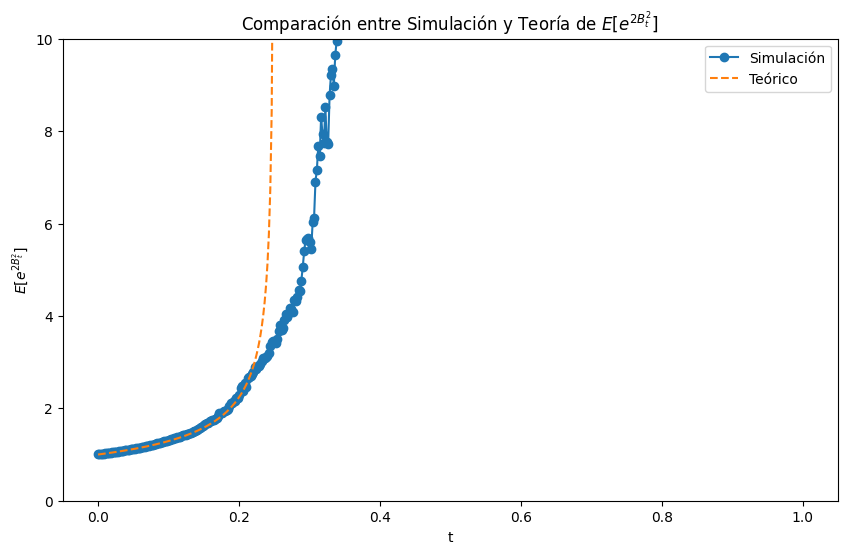

In [ ]:
class BrownianoEsperado(MovimientoBrownianoBasico):
    def aplicar_transformacion(self):
        self.descripcion = 'Valor esperado $E[e^{2B_t^2}]$'
        # Nota: No transponemos aquí para mantener las dimensiones alineadas.
        self.posiciones = np.exp(2 * self.posiciones**2)

    def valor_esperado_empirico(self):
        # Calcula el valor esperado empírico a lo largo de la dimensión de trayectorias
        return np.mean(self.posiciones, axis=0)

def theoretical_expectation(t):
    return np.where(t <= 0.25, np.power(1 - 4*t, -0.5), np.inf)

e_sim = BrownianoEsperado(10000, 500, 1)
e_sim.aplicar_transformacion()
expectation_simulated = e_sim.valor_esperado_empirico()
expectation_theoretical = theoretical_expectation(e_sim.eje_tiempo)

# Ajustamos para empezar desde el primer punto temporal para evitar la división por cero o valores infinitos
plt.figure(figsize=(10, 6))
plt.plot(e_sim.eje_tiempo, expectation_simulated, label='Simulación', marker='o')
plt.plot(e_sim.eje_tiempo, expectation_theoretical, label='Teórico', linestyle='--')
plt.xlabel('t')
plt.ylabel('$E[e^{2B_t^2}]$')
plt.title('Comparación entre Simulación y Teoría de $E[e^{2B_t^2}]$')
plt.legend()
plt.ylim(0, 10)
plt.show()

Para concluir sobre los resultados obtenidos en la simulación computacional que demuestra

1. **Aproximación a la Expectativa Teórica**: Los resultados como se ve en la imagen se aproximan a la función teórica $(1 - 4t)^{-\frac{1}{2}}$ para $0 \leq t \leq \frac{1}{4}$ y tienden a infinito fuera de este intervalo, esto sugiere que la simulación es consistente con la teoría matemática detrás del Movimiento Browniano Estándar. La concordancia entre los resultados simulados y los teóricos valida la relación expresada y su dependencia temporal.

2. **Importancia del Intervalo $0 \leq t \leq \frac{1}{4}$**: La especificidad del intervalo $0 \leq t \leq \frac{1}{4}$ es crucial, ya que demuestra cómo el comportamiento del valor esperado cambia dramáticamente más allá de este punto, reflejando las propiedades únicas del Movimiento Browniano Estándar y la exponencial de su cuadrado.

3. **Observaciones sobre la Convergencia a Infinito**: El hecho de que el valor esperado tienda a infinito fuera del intervalo dado subraya la naturaleza explosiva de la exponencial de procesos estocásticos cuadráticos. Esto resalta la importancia de entender las condiciones bajo las cuales se evalúan las expectativas de tales funciones.

4. **Implicaciones y Aplicaciones**: La confirmación de esta relación a través de simulaciones no solo refuerza la comprensión teórica del comportamiento de los procesos estocásticos, sino que también demuestra la potencia de las simulaciones computacionales para explorar y verificar propiedades matemáticas complejas que pueden ser difíciles de visualizar o probar analíticamente.

5. **Limitaciones y Consideraciones Futuras**: Aunque las simulaciones ofrecen una poderosa herramienta para la validación teórica, es importante tener en cuenta las limitaciones inherentes a este enfoque, como la precisión numérica y el tamaño de la muestra. Experimentos futuros podrían explorar diferentes parámetros de simulación, tamaños de muestra más grandes o técnicas computacionales avanzadas para mejorar la precisión y la robustez de las conclusiones.


# Punto 2
Considera los siguientes procesos estocásticos:



*   Movimiento Browniano Geométrico
*   Movimiento Browniano Bridge
*   $W_t = B_{3t} - e^{\sigma  B_{t}}$ con $\{B_t\}$  $t≥0$ un Movimiento Browniano Estándar y σ ∈ $\mathbb{R}$.

A partir de ellos y a través de simulación computacional,  
**a)** Obtén las propiedades distribucionales teóricas, esto es, el valor esperado, la varianza, la covarianza y su correlación.  
**b)** Simula trayectorias para 500 puntos del tiempo igualmente espaciados y obtén las medidas de centralidad, varianza, covarianza y correlación empíricas.  
**c)** Contrasta las propiedades distribucionales teóricas y empíricas de los puntos anteriores. ¿Con qué número de trayectorias se logra la convergencia?  
**d)** Analiza su distribución.  
**e**) ¿Son Movimientos Brownianos Estándar?







## Punto a

Dsiponible en el pdf

**Movimiento Browniano Geométrico**


**Propiedades Teóricas:**

**Valor Esperado:**

$E[W_t] = E[e^{(\alpha+\lambda B_t)t}$


$E[W_t] = e^{\alpha t}E[e^{(\lambda B_t)t}$


Apliacando la transformación


$B_t~N(0,1)\cdot \sqrt(t)$

y la función caracteristica:


$E[W_t] = e^{(\alpha + \frac{1}{2})\lambda^2}t$

**Covarianza**

$Cov(W_t, W_s) = E[(W_t - E[W_t]) (W_s - E[W_s])]$

$= E\left[ \left(e^{\alpha t + \lambda \beta_t} - e^{\alpha \frac{t}{2}}\right) \left(e^{\alpha s + \lambda \beta_s} - e^{\alpha \frac{s}{2}}\right) \right]$

$= e^{\alpha(t+s)} E\left[e^{\lambda(\beta_t + \beta_s)}\right] - e^{\alpha (t+s)+\frac{\lambda ^2}{2}s} E\left[e^{\lambda \beta_t}\right]$

$\quad - e^{\alpha (t+s)+\frac{\lambda^2}{2}} E\left[e^{\lambda \beta_s}\right] + e^{(\alpha+\frac{\lambda^2}{2})(t+s)}$

$\text{Tomando en cuenta que } s \leq t \text{ Y la primera parte}$

$\Rightarrow E\left[e^{\lambda(\beta_t - \beta_s) + (2B_s)}\right]$

$= E\left[e^{\lambda \sqrt{(t-s)} \beta_1} \right]E\left[e^{2\lambda \sqrt{(s)} \beta_1} \right]$

$= e^{\frac{\lambda^2}{2}(t-s)}e^{4\frac{\lambda^2s}{2}}$

$= e^{\alpha(t+s)} e^{\frac{\lambda^2}{2}(t+s)} - e^{\frac{\lambda^2}{2}(t+s)}$

$\text{Tomando la otra parte}$

$= e^{\alpha(t+s)+\frac{\lambda^2s}{2}}  E\left[e^{\lambda \sqrt{t} \beta_1}\right]$

$= e^{\alpha(t+s)+\frac{\lambda^2s}{2}} e^{\frac{\lambda^2t}{2}} $

$\text{Uniendo ambos resultados:}$

$=e^{\alpha(t+s)} (e^{\frac{\lambda^2}{2}(t-s)}e^{4\frac{\lambda^2s}{2}})-e^{\alpha(t+s) +\frac{\lambda^2}{2}(t+s)}$\\\\
$Cov(W_t, W_s) = e^{(\alpha+\frac{\lambda^2}{2})(t+s)} \left( e^{\lambda^2s} - 1 \right)$

$\text{En general}$

$Cov(W_t, W_s) = e^{(\alpha+\frac{\lambda^2}{2})(t+s)} \left( e^{\lambda^2min\{s,t\}} - 1 \right)$

**Varianza:**

Con lo anterior podemos deducir que

 $$Var(W_t)= Cov(W_t, W_t) =  e^{2t(\alpha+\frac{\lambda^2}{2})}(e^{\lambda^2 t} - 1)$$

**Correlacion**

Esta dada por:
$\frac{e^{(\alpha+\frac{\lambda^2}{2})(t+s)} \left( e^{\lambda^2min\{s,t\}} - 1 \right)}{\sqrt{e^{2s(\alpha+\frac{\lambda^2}{2})}(e^{\lambda^2 s} - 1) \cdot e^{2t(\alpha+\frac{\lambda^2}{2})}(e^{\lambda^2 t} - 1)}}$

**Simulación Computacional:**(En collab)

1. Generamos trayectorias del Movimiento Browniano Estándar.

2. Aplicar la transformación para obtener el MBG

**Movimiento Browniano Bridge**

**Propiedades Teóricas:**

**Valor Esperado:**

$E[W_t] = E[B_t]-tE[B_1]=0$

porque $B_t$ es un movimiento Browniano

**Varianza:**

$Var(W_t) = E[(B_t-tB_1)^2]-E[(B_t-tB_1)]^2$

$Var(W_t) = E[(B_t^2-2tB_tB_1+t^2B_1^2)]$

$Var(W_t) = E[B_t^2]-2tE[B_tB_1]+t^2E[B_1^2]$

$Var(W_t) = t - 2t(t)+t^2$

$Var(W_t) = t(1-t), \hspace{0.4 cm} para \hspace{0.4 cm}0 \leq t \leq 1$


**Covarianza:**


\begin{align*}
Cov(W_t, W_s) &= E[(W_t - E[W_t])(W_s - E[W_s])] \\
&= E[W_tW_s] - E[W_t]E[W_s] \\
&= E[(\beta_t - t\beta_1)(\beta_s - s\beta_1)] \\
&= E[\beta_t \beta_s] + tsE[\beta_1^2] - E[t\beta_s\beta_1] - E[s\beta_1\beta_t] \\
&= \min(s,t) + ts - ts(E[\beta_1^2]) - s(E[\beta_t]) \\
&= \min(s,t) + ts - ts - s(t) \\
&= \min(s,t) - st
\end{align*}
$\textbf{Correlación}$

$\frac{\min(s,t) - st}{\sqrt{t(1-t)\cdot s(1-s)}}$

$\textbf{Simulación Computacional:}$ (En collab)

1. Simulamos un Movimiento Browniano Estándar.

2. Transformarlo en un Bridge

$W_t = B_{t}^3 - e^{\sigma B_t}$

\textbf{\textit{Propiedades Teóricas:}}

Este es un proceso estocástico que no se ajusta directamente a los marcos estándar de valor esperado y varianza sin alguna transformación adicional. Sin embargo, se puede explorar cómo uno asociado.

$\textbf{Valor Esperado:}\\$
$E[W_t] = E[W_t = B_{t}^3 - e^{\sigma B_t}]$

$E[W_t] = E[B_{t}^3] - E[e^{\sigma B_t}]$

$E[W_t] = 0 - e^{\sigma^2\frac{t}{2}}$

Ahora calculemos la covarianza para encontrar las otras medidad:

$\textbf{Covarianza:}$

$\text{Cov}(W_t, W_s) = \mathbb{E}[(W_t - \mathbb{E}[W_t])(W_s - \mathbb{E}[W_s])] $

$= \mathbb{E}[B_{t}^3B_{s}^3] - \mathbb{E}[B_{t}^3e^{\sigma B_s}] - \mathbb{E}[e^{\sigma B_t}B_{s}^3] + \mathbb{E}[e^{\sigma B_t}e^{\sigma B_s}] + \mathbb{E}[B_t^3-e^{\sigma B_t}]\mathbb{E}[B_s^3-e^{\sigma B_s}]$

$\quad -\mathbb{E}[e^{\sigma B_s}e^{\sigma^2\frac{t}{2}}]-\mathbb{E}[e^{\sigma B_t}e^{\sigma^2\frac{s}{2}}]$

$= \mathbb{E}[B_{t}^3B_{s}^3] + \mathbb{E}[e^{\sigma (B_t+B_s)}] +e^{\frac{\sigma^2(t+s)}{2}}-2e^{\frac{\sigma^2(t+s)}{2}}- \mathbb{E}[e^{\sigma B_t}B_{s}^3]- \mathbb{E}[e^{\sigma B_s}B_{t}^3]$

$=\text{Donde:}$


$\mathbb{E}[e^{\sigma (B_t+B_s)}]=\mathbb{E}[e^{\sigma (B_t-B_s)+2\sigma B_s}]=e^{\sigma^2\frac{(t-s)}{2}}e^{\sigma^2 (2s)}$

$=\text{Y :}$

$\mathbb{E}[B_{t}^3B_{s}^3]=  \mathbb{E}[B_s^3(B_s+(B_{t}-B_{s})^3)]$

$\mathbb{E}[B_{t}^3B_{s}^3]= \mathbb{E}[B_s^3((B_{t}-B_{s})^3)]+3\mathbb{E}[B_s^4(B_{t}-B_{s})^2]+3\mathbb{E}[B_s^5(B_{t}-B_{s})]+ \mathbb{E}[B_s^6]$

$= 3\mathbb{E}[B_s^4(B_{t}-B_{s})^2]+15s^3$

$=3(t-s)\frac{(2(2)!s^2}{2^22}+15s^3$

$=9ts^2-9s^3+15s^3$

 $\text{Ahora solucionamos }\mathbb{E}[B_t^3e^{\sigma B_s}]:$

$ = \mathbb{E}[B_t^3e^{\sigma B_s}]$

$= \mathbb{E}[(B_t-B_s)+B_s)^3e^{\sigma B_s}]$

$= \mathbb{E}[(B_t-B_s)^3e^{\sigma B_s}+3B_s(B_t-B_s)^2e^{\sigma B_s}+3B_s^2(B_t-B_s)e^{\sigma B_s}+B_s^3e^{\sigma B_s}]$

Utilizando la independencia entre incrementos:

$= \mathbb{E}[(B_t-B_s)^3]\mathbb{E}[e^{\sigma B_s}] +3\mathbb{E}[(B_t-B_s)^2] \mathbb{E}[B_se^{\sigma B_s}] +3\mathbb{E}[(B_t-B_s)] \mathbb{E}[e^{\sigma B_s}B_s^2] +\mathbb{E}[e^{\sigma B_s}]$

$= 0+3(t-s)\mathbb{E}[\sum_{n=0}^{\infty}\frac{\sigma^n B_s^{n+1}}{n!}]+0+e^{\frac{\sigma^2} {2}s}s^2\sigma(3+s\sigma^2)$

$= 3(t-s) \left(\sum_{k=0}^{\infty}\frac{(\sigma^{2k} \mathbb{E}[B_s^{2k+1}])}{(2k)!} + \sum_{k=0}^{\infty}\frac{(\sigma^{2k+1}\mathbb{E}[B_s^{2k+2}]}{(2k+1)!}\right)+e^{\frac{\sigma^2}{2}s}s^2\sigma(3+s\sigma^2)$

$= 3(t-s) \left( 0 + \sum_{k=0}^{\infty}\frac{(\sigma^{2k+1}\mathbb{E}[B_s^{2(k+1)}]}{(2k+1)!}\right)+e^{\frac{\sigma^2}{2}s}s^2\sigma(3+s\sigma^2)$

$= 3(t-s) \bigg[\sigma s\left(\sum_{k=0}^{\infty}\frac{(\sigma^2s)^{k}(2k+2)}{2^k 2(k+1)k!}\right)\bigg]+e^{\frac{\sigma^2}{2}s}s^2\sigma(3+s\sigma^2)$

$= 3(t-s) \bigg[\sigma s\left(\sum_{k=0}^{\infty}\frac{(\sigma^2s)^{k}}{2^kk!}\right) \bigg]+e^{\frac{\sigma^2}{2}s}s^2\sigma(3+s\sigma^2)$

$=3(t-s)\sigma se^{\frac{\sigma^2s}{2}}+e^{\frac{\sigma^2s}{2}}s^2\sigma(3+s\sigma^2)$

$=3t\sigma se^{\frac{\sigma^2s}
{2}}+e^{\frac{\sigma^2s}{2}}s^3\sigma^3$

Finalmente:

$E[e^{\sigma B_t} B_s^3] = E[e^{(\sigma (B_t - B_s) + B_s)} B_s^3]$

$= E[e^{\sigma (B_t - B_s)} e^{\sigma B_s} B_s^3]$

$= e^{\frac{1}{2} \sigma^2  (t-s)} E[e^{\sigma B_s} B_s^3]$

$= e^{\frac{1}{2} \sigma^2  (t-s)} \left( E \left[ \sum_{n=0}^{\infty} \frac{(\sigma B_s)^n}{n!} B_s^3 \right] \right)$

$= e^{\frac{1}{2} \sigma^2 (t-s)} \left( \sum_{n=0}^{\infty} \frac{\sigma^n}{2k!} E[B_s^{2k+3}] + \sum_{n=0}^{\infty} \frac{\sigma^{n+1} B_s^{2k+4}}{(2k+1)!} \right)$

$= e^{\frac{1}{2} \sigma^2  (t-s)} \left( \sigma^0 E[B_s^3] + \sum_{k=0}^{\infty} \frac{\sigma^{2k}}{2k!} E[B_s^{2k+3}] + \sum_{k=0}^{\infty} \frac{\sigma^{2k+1} E[B_s^{2(k+2)}]}{2k+1!} \right)$

$= e^{\frac{1}{2} \sigma^2 (t-s)} \left(\sum_{k=0}^{\infty} \frac{\sigma^{2k+1} (2k+4)}{(2k+1)!2^{k+2}(k+2)!} s^{k+2} \right)$

$= e^{\frac{1}{2} \sigma^2 (t-s)} \left( \sigma s^2\sum_{k=0}^{\infty} \frac{4\left( k + 1)(k+2) + (3k+2)(s\sigma^2)^{k} \right)}{2^k4(k+1)(k+2)k!} \right)$

$= e^{\frac{1}{2} \sigma^2 (t-s)} \left( \sigma s^2\sum_{k=0}^{\infty} \frac{(3+2k)(s\sigma^2)^{k}}{2k!} \right)$

$= e^{\frac{1}{2} \sigma^2 t} s^3 (3 + s^2 \sigma)$

Juntando todo se obtiene:

$= 6s^3 + 9s^2t - e^{\frac{\sigma^2}{2}t} s^2 \sigma (3 + s \sigma^2) - 3t \sigma e^{\frac{\sigma^2}{2}s} + s^3 \sigma^3 e^{\frac{\sigma^2}{2}s} + e^{\frac{\sigma^2}{2}(t-s)} e^{2\sigma^2s} - e^{\frac{\sigma^2}{2}(t+s)}$

$\textbf{ Varianza:}$

Al igual que el geometrico si hacemos $t=s$, tenemos que:
$$Cov(W_t,W_t)= Var(W_t)$$
$
Var(W_t) =15t^3 - 2[e^{\frac{\sigma^2}{2}t}t^2\sigma(3+t\sigma^2)] +e^{2t\sigma^2}-e^{t\sigma^2}
$

$\textbf{Correlación}$

$
\frac{6s^3 + 9s^2t - e^{\frac{\sigma^2}{2}t} s^2 \sigma (3 + s \sigma^2) - 3t \sigma e^{\frac{\sigma^2}{2}s} + s^3 \sigma^3 e^{\frac{\sigma^2}{2}s} + e^{\frac{\sigma^2}{2}(t-s)} e^{2\sigma^2s} - e^{\frac{\sigma^2}{2}(t+s)}}{\sqrt{15t^3 - 2[e^{\frac{\sigma^2}{2}t}t^2\sigma(3+t\sigma^2)] +e^{2t\sigma^2}-e^{t\sigma^2}}\sqrt{15s^3 - 2[e^{\frac{\sigma^2}{2}s}s^2\sigma(3+s\sigma^2)] +e^{2s\sigma^2}-e^{s\sigma^2}}}$

$\textbf{Simulación Computacional:}$

1. Generamos trayectorias del Movimiento Browniano Estándar.\\
2. Aplicar la transformación: $W_t = B_{t}^3 - e^{\sigma B_t}$.

## **Punto b y c**
Obtén las propiedades distribucionales teóricas, esto es, el valor esperado, la varianza, la covarianza y su correlación

Contraste teóricas y empíricas:

**Primero haremos el punto b y c del geométrico:**

# **Geométrico**
**PUNTO B**


Simulamos trayectorias y gráficamos:

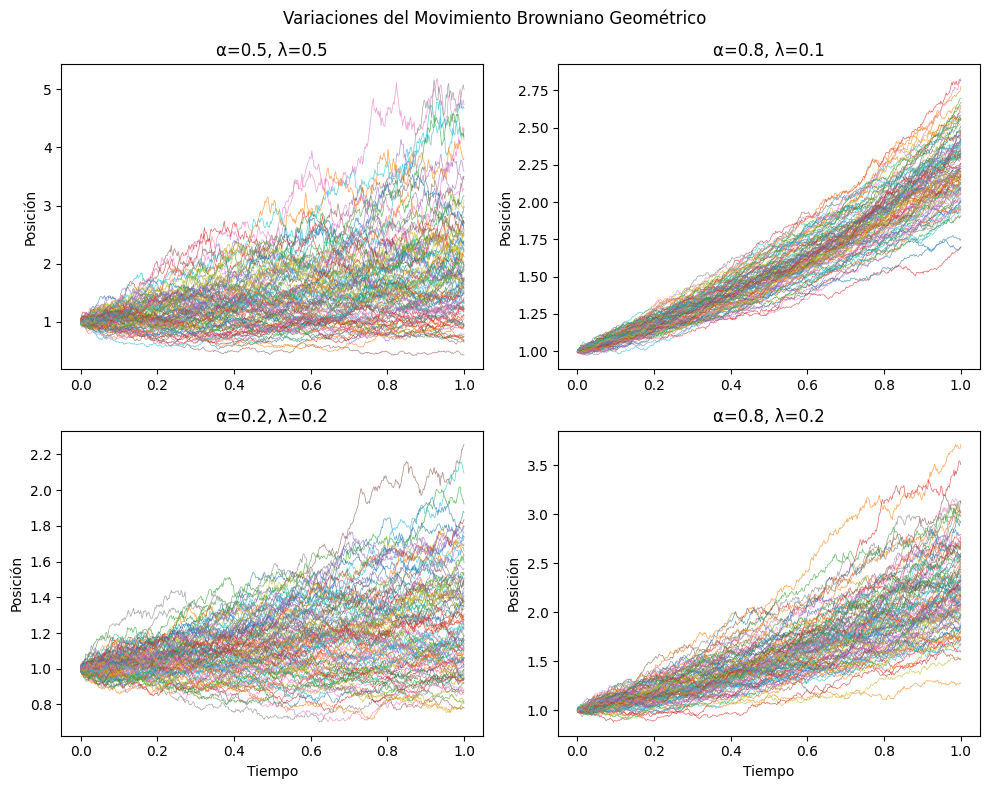

In [ ]:
class BrownianoGeometrico(MovimientoBrownianoBasico):
    def __init__(self, cantidad_trayectorias, cantidad_puntos, duracion):
        super().__init__(cantidad_trayectorias, cantidad_puntos, duracion)

    def aplicar_transformacion_geometrica(self, alpha, lambda_):
        # Actualiza la descripción para reflejar el movimiento geométrico
        self.descripcion = 'Movimiento Browniano Geométrico'
        self.alpha = alpha
        self.lambda_ = lambda_
        # Aplica la transformación geométrica a las posiciones
        self.posiciones = np.exp(self.alpha * self.eje_tiempo[:, None] + self.lambda_ * self.posiciones.T).T
    def valor_esperado_empirico2(self):
        # Calcula el valor esperado empírico a lo largo de la dimensión de trayectorias
        return np.mean(self.posiciones, axis=0)
    def visualizar_covarianza_empirica2(self):
        # Cálculo de la matriz de covarianza de las trayectorias simuladas
        return np.cov(self.posiciones, rowvar=False, ddof=1)
    def visualizar_correlacion_empirica2(self):
        # Cálculo de la matriz de correlacion de las trayectorias simuladas
        return np.corrcoef(self.posiciones, rowvar=False, ddof=1)
    def calcular_varianza_empirica_y_graficar2(self):
        # Este método calcula la varianza de las trayectorias simuladas en cada punto temporal
        varianza_empirica = np.var(self.posiciones, axis=0, ddof=1)
        puntos_temporales = np.arange(self.cantidad_puntos) * self.delta_tiempo
        return varianza_empirica,puntos_temporales
# Configuraciones de parámetros para varias simulaciones
parametros = [(0.5, 0.5), (0.8, 0.1), (0.2, 0.2), (0.8, 0.2)]
# Preparación del área de visualización
figura, ejes = plt.subplots(2, 2, figsize=(10, 8))
ejes = ejes.flatten()

# Iteración sobre cada configuración de parámetros
for indice, (alpha, lambda_) in enumerate(parametros):
    simulacion = BrownianoGeometrico(1000, 500, 1)
    simulacion.aplicar_transformacion_geometrica(alpha, lambda_)
    # Visualización de una muestra de trayectorias
    for trayectoria in range(100):
        ejes[indice].plot(simulacion.eje_tiempo, simulacion.posiciones[trayectoria], lw=0.5, alpha=0.7)
    # Ajustes finales de la visualización
    ejes[indice].set_title(f'α={alpha}, λ={lambda_}')
    if indice >= 2:
        ejes[indice].set_xlabel('Tiempo')
    ejes[indice].set_ylabel('Posición')

# Título general y ajustes de layout
figura.suptitle('Variaciones del Movimiento Browniano Geométrico')
plt.tight_layout()
plt.show()

Sacamos el valor esperado empírico:

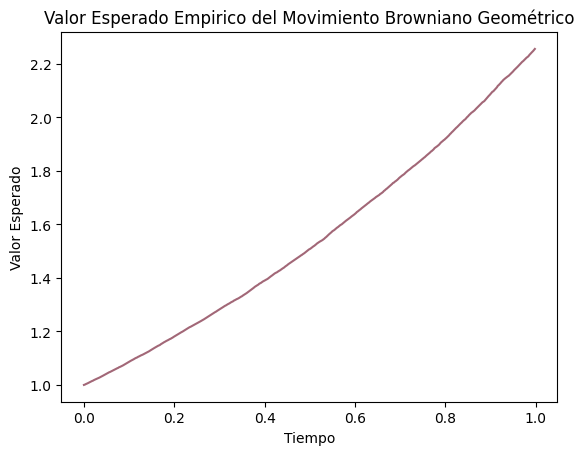

In [ ]:
val_esperado_geometrico = simulacion.valor_esperado_empirico()
#print(f'Valor Esperado Empírico: {val_esperado_geometrico}')

Gráficamos la varianza empiríca:

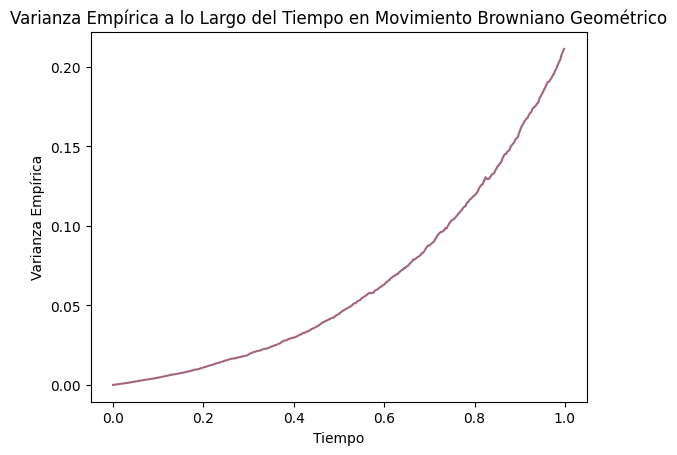

In [ ]:
variance_geometric = simulacion.calcular_varianza_empirica_y_graficar()

Matriz de covarianzas empíricas:

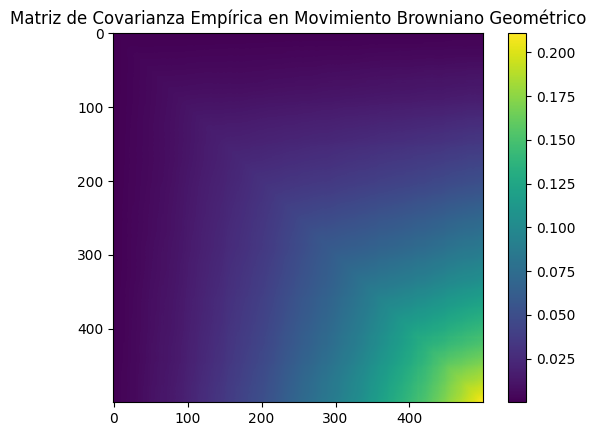

In [ ]:
covarianza_geometrico = simulacion.visualizar_covarianza_empirica()

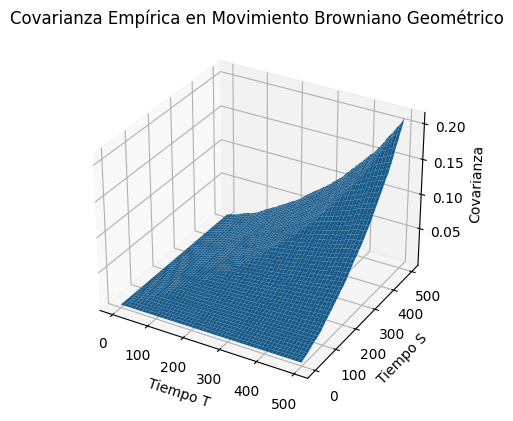

In [ ]:
covarianza_geometrico = simulacion.visualizar_covarianza_empirica(en_3d=True)

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


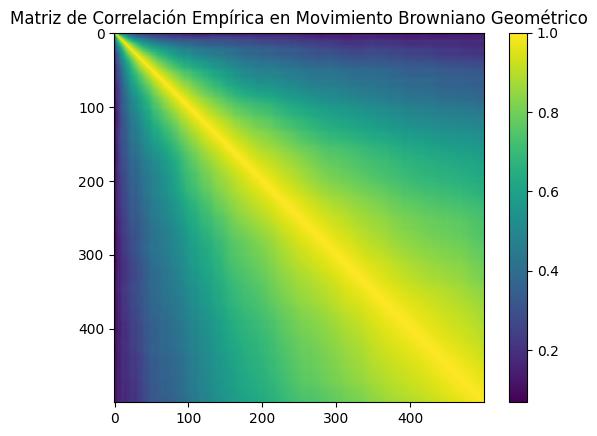

In [ ]:
corr_geometrico = simulacion.visualizar_corr_empirica()

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


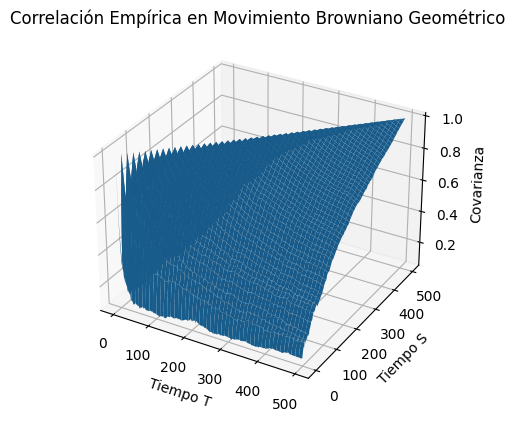

In [ ]:
corr_geometrico = simulacion.visualizar_corr_empirica(en_3d=True)

**PUNTO C**  

CONTRASTE: (GEOMÉTRICO)

En este punto se compara las propiedades distribucionales que se obtuvieron anteriormente, particuralmente la varianza y media
y para ver cuando converge se utiliza el **valor esperado**

**Convergencia**

1) Valor esperado $E[W_t] = e^{(\alpha + \frac{1}{2} \lambda^2)t}$ vs empírico

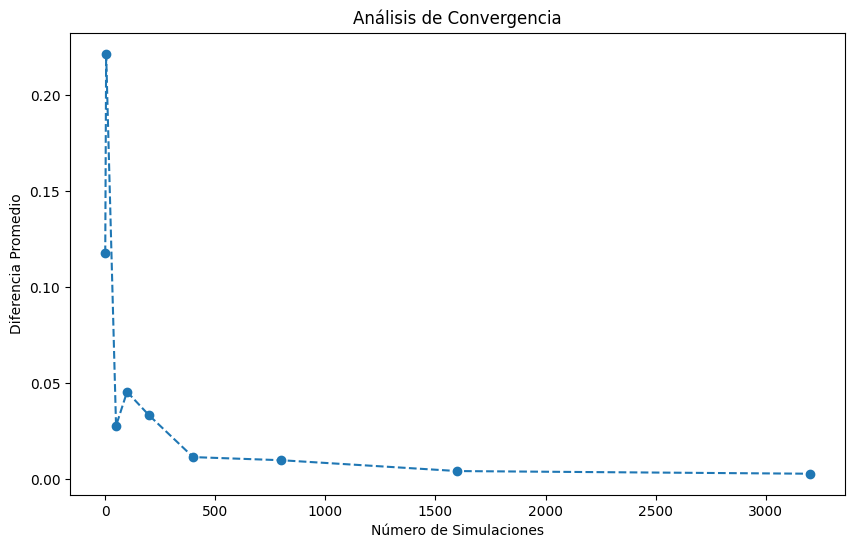

In [ ]:
def theoretical_expectation_geom(t, alpha, lambda_):
    return np.exp((alpha + (lambda_**2) / 2) * t)


num_simulaciones = [1, 5, 50, 100, 200, 400, 800, 1600, 3200]  # Ejemplo de rango
diferencias = []  # Para almacenar la diferencia promedio para cada número de simulaciones

for n in num_simulaciones:
    g_simulacion = BrownianoGeometrico(n, 500, 1)  # Asumiendo que '500' y '1' son parámetros fijos
    g_simulacion.aplicar_transformacion_geometrica(0.5, 0.5)
    val_esperado_geometrico = g_simulacion.valor_esperado_empirico2()

    # Calcular el valor teórico
    esperado_teorico_geome = theoretical_expectation_geom(g_simulacion.eje_tiempo, 0.5, 0.5)

    # Calcular la diferencia promedio entre los valores simulados y teóricos
    diferencia = np.mean(abs(val_esperado_geometrico - esperado_teorico_geome))
    diferencias.append(diferencia)

# Graficar la diferencia promedio vs. número de simulaciones
plt.figure(figsize=(10, 6))
plt.plot(num_simulaciones, diferencias, marker='o', linestyle='--')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Diferencia Promedio')
plt.title('Análisis de Convergencia')
plt.show()

**Contraste varianza y valor esperado**

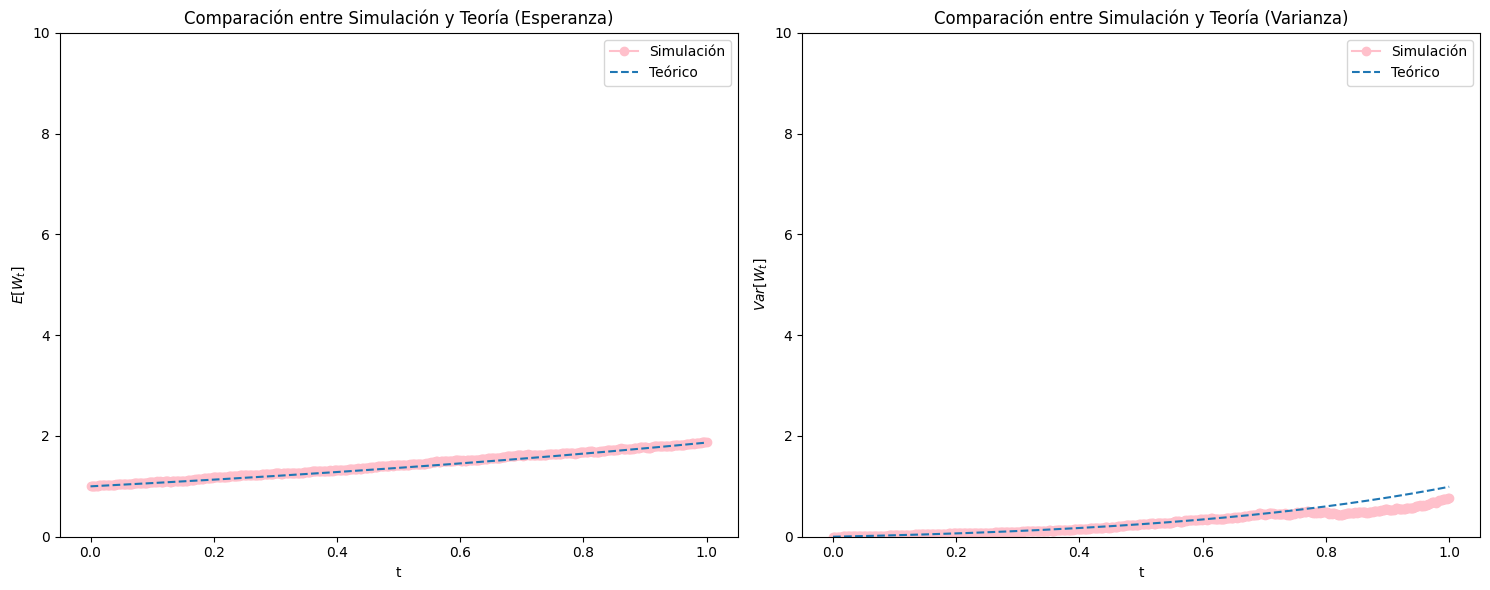

In [ ]:
def theoretical_variance_geom(t, alpha, lambda_):
    return np.exp(2 * t * (alpha + (lambda_**2) / 2)) * (np.exp(lambda_**2 * t) - 1)
esperado_teorico_geome = theoretical_expectation_geom(simulacion.eje_tiempo, 0.5, 0.5)
g_simulacion = BrownianoGeometrico(100, 500, 1)
g_simulacion.aplicar_transformacion_geometrica(0.5, 0.5)
val_esperado_geometrico = g_simulacion.valor_esperado_empirico2()
var_teorico_geome = theoretical_variance_geom(g_simulacion.eje_tiempo, 0.5, 0.5)
var_geometrico,puntos_temporales = g_simulacion.calcular_varianza_empirica_y_graficar2()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Expected Value
axes[0].plot(g_simulacion.eje_tiempo, val_esperado_geometrico, label='Simulación', marker='o', color='pink')
axes[0].plot(g_simulacion.eje_tiempo, esperado_teorico_geome, label='Teórico', linestyle='--')
axes[0].set_xlabel('t')
axes[0].set_ylabel('$E[W_t]$')
axes[0].set_title('Comparación entre Simulación y Teoría (Esperanza)')
axes[0].legend()
axes[0].set_ylim(0, 10)

# Plot for Variance
axes[1].plot(g_simulacion.eje_tiempo, var_geometrico, label='Simulación', marker='o', color='pink')
axes[1].plot(g_simulacion.eje_tiempo, var_teorico_geome, label='Teórico', linestyle='--')
axes[1].set_xlabel('t')
axes[1].set_ylabel('$Var[W_t]$')
axes[1].set_title('Comparación entre Simulación y Teoría (Varianza)')
axes[1].legend()
axes[1].set_ylim(0, 10)

plt.tight_layout()
plt.show()

**Contraste covarianza**

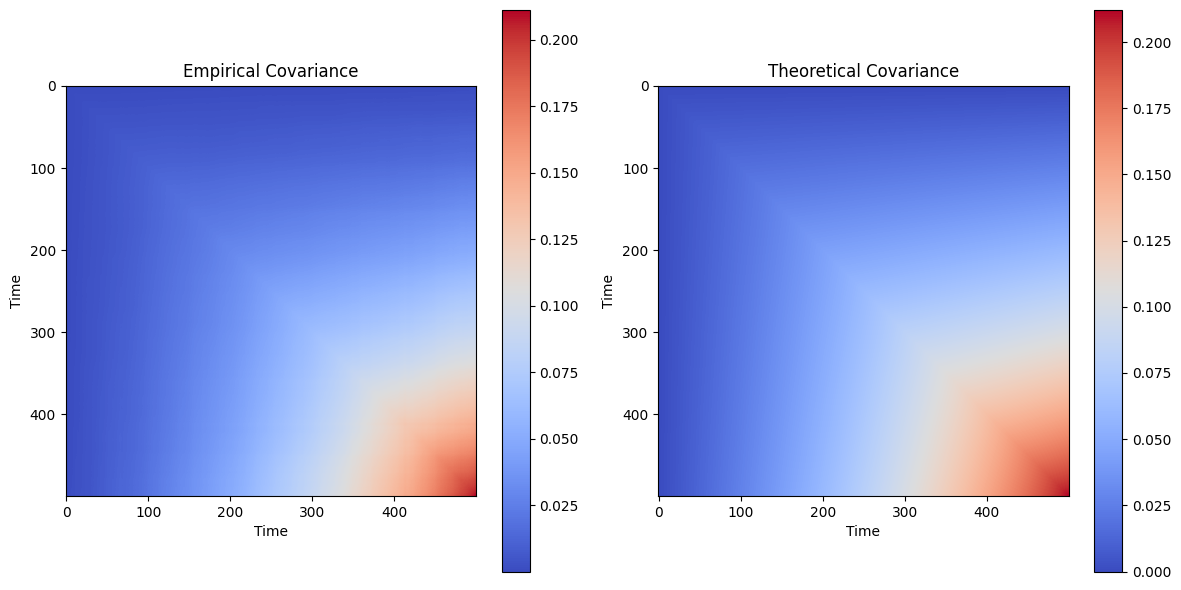

In [ ]:
def theoretical_covariance_geom(t, alpha, lambda_):
    return np.exp((alpha + (lambda_**2) / 2) * (t[None, :] + t[:, None])) * (np.exp(lambda_**2 * np.minimum(t[None, :], t[:, None])) - 1)

cov_empirical = simulacion.visualizar_covarianza_empirica2()
t = simulacion.eje_tiempo


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
im1 = ax[0].imshow(cov_empirical, cmap='coolwarm')
ax[0].set_title('Empirical Covariance')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Time')
fig.colorbar(im1, ax=ax[0])

cov_theoretical = theoretical_covariance_geom(t, 0.5, 0.265)
im2 = ax[1].imshow(cov_theoretical, cmap='coolwarm')
ax[1].set_title('Theoretical Covariance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Time')
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()


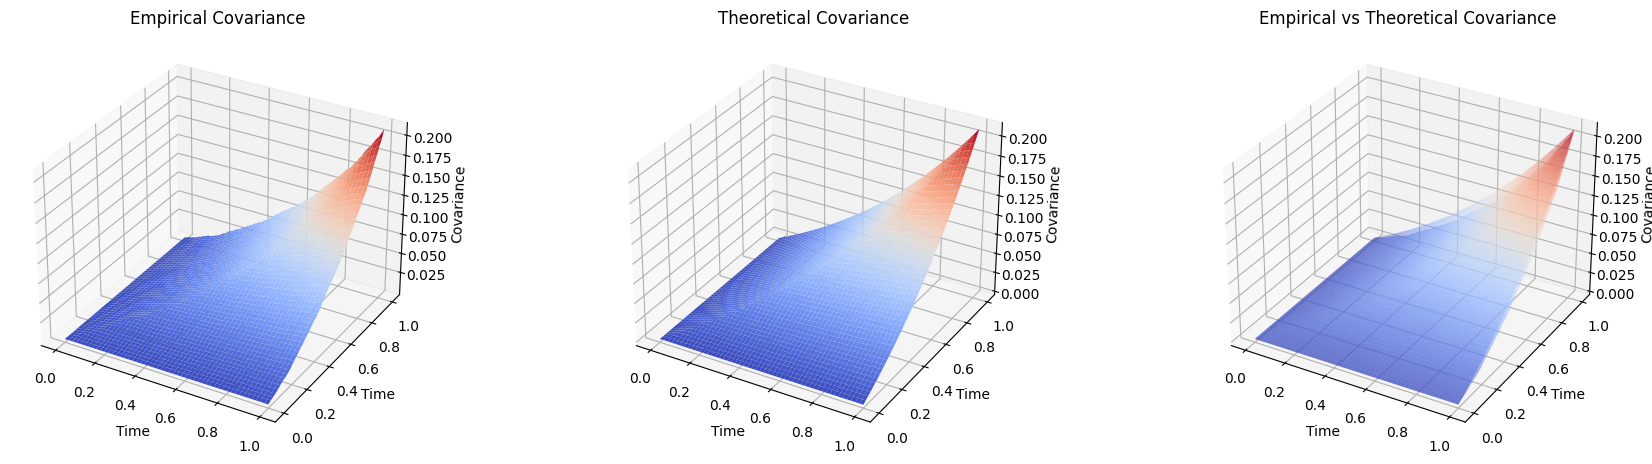

In [ ]:
def theoretical_covariance_geom(t, alpha, lambda_):
    return np.exp((alpha + (lambda_**2) / 2) * (t[None, :] + t[:, None])) * (np.exp(lambda_**2 * np.minimum(t[None, :], t[:, None])) - 1)

# Assuming simulacion.visualizar_covarianza_empirica2() returns a 2D array
cov_empirical = simulacion.visualizar_covarianza_empirica2()
t = simulacion.eje_tiempo

# Visualización en gráficos 3D
fig = plt.figure(figsize=(18, 9))

# Empirical Covariance
ax1 = fig.add_subplot(231, projection='3d')
t1, t2 = np.meshgrid(t, t)
ax1.plot_surface(t1, t2, cov_empirical, cmap='coolwarm')
ax1.set_title('Empirical Covariance')
ax1.set_xlabel('Time')
ax1.set_ylabel('Time')
ax1.set_zlabel('Covariance')

# Theoretical Covariance
ax2 = fig.add_subplot(232, projection='3d')
cov_theoretical = theoretical_covariance_geom(t, 0.5, 0.265)
ax2.plot_surface(t1, t2, cov_theoretical, cmap='coolwarm')
ax2.set_title('Theoretical Covariance')
ax2.set_xlabel('Time')
ax2.set_ylabel('Time')
ax2.set_zlabel('Covariance')

# Superposición de Covarianza Empírica y Teórica
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(t1, t2, cov_empirical, cmap='coolwarm', alpha=0.5, label='Empirical')
ax3.plot_surface(t1, t2, cov_theoretical, cmap='coolwarm', alpha=0.5, label='Theoretical')
ax3.set_title('Empirical vs Theoretical Covariance')
ax3.set_xlabel('Time')
ax3.set_ylabel('Time')
ax3.set_zlabel('Covariance')

plt.tight_layout()
plt.show()



**Contraste correlación**

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


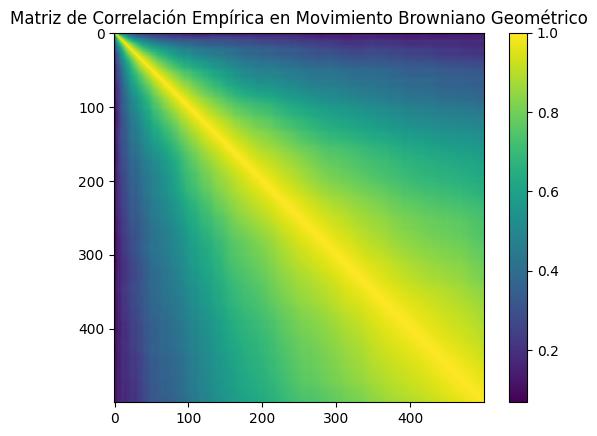

<ipython-input-15-e66ee1e5c282>:5: RuntimeWarning: invalid value encountered in divide
  return cov_theoretical / np.sqrt(var_theoretical[:, None] * var_theoretical[None, :])


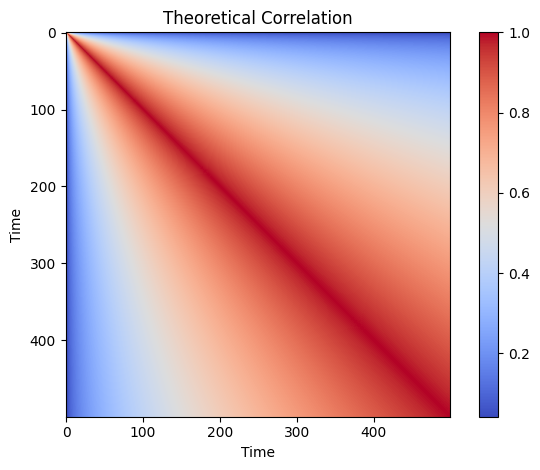

In [ ]:
cor_empirical = simulacion.visualizar_corr_empirica()
def theoretical_correlation_geom(t, alpha, lambda_):
    cov_theoretical = theoretical_covariance_geom(t, alpha, lambda_)
    var_theoretical = theoretical_variance_geom(t, alpha, lambda_)
    return cov_theoretical / np.sqrt(var_theoretical[:, None] * var_theoretical[None, :])

corr_theoretical = theoretical_correlation_geom(t, 0.5, 0.5)

plt.imshow(corr_theoretical, cmap='coolwarm')
plt.title('Theoretical Correlation')
plt.xlabel('Time')
plt.ylabel('Time')
plt.colorbar()
plt.tight_layout()
plt.show()




<ipython-input-105-ea4036a1f080>:20: DeprecationWarning: bias and ddof have no effect and are deprecated
  return np.corrcoef(self.posiciones, rowvar=False, ddof=1)
<ipython-input-112-c7670dc622a5>:6: RuntimeWarning: invalid value encountered in divide
  return cov_theoretical / np.sqrt(var_theoretical[:, None] * var_theoretical[None, :])


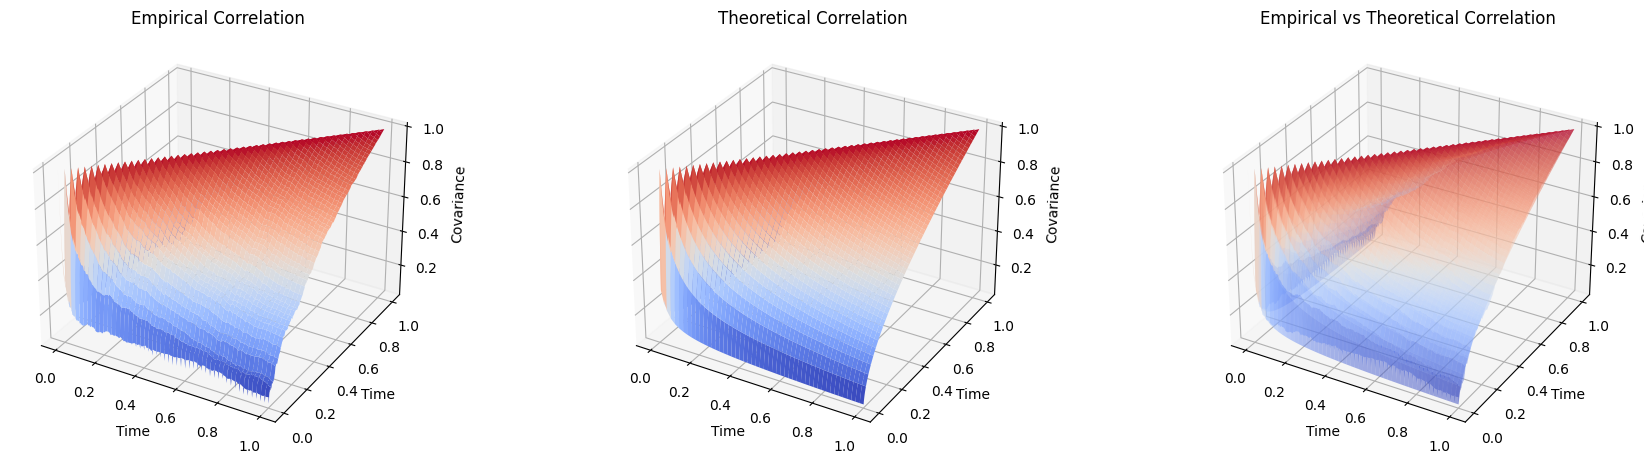

In [ ]:
corr_empirical = simulacion.visualizar_correlacion_empirica2()

def theoretical_correlation_geom(t, alpha, lambda_):
    cov_theoretical = theoretical_covariance_geom(t, alpha, lambda_)
    var_theoretical = theoretical_variance_geom(t, alpha, lambda_)
    return cov_theoretical / np.sqrt(var_theoretical[:, None] * var_theoretical[None, :])

corr_theoretical = theoretical_correlation_geom(t, 0.5, 0.5)

fig = plt.figure(figsize=(18, 9))

# Empirical Covariance
ax1 = fig.add_subplot(231, projection='3d')
t1, t2 = np.meshgrid(t, t)
ax1.plot_surface(t1, t2, corr_empirical, cmap='coolwarm')
ax1.set_title('Empirical Correlation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Time')
ax1.set_zlabel('Covariance')

# Theoretical Covariance
ax2 = fig.add_subplot(232, projection='3d')
corr_theoretical = theoretical_correlation_geom(t, 0.5, 0.5)
ax2.plot_surface(t1, t2, corr_theoretical, cmap='coolwarm')
ax2.set_title('Theoretical Correlation')
ax2.set_xlabel('Time')
ax2.set_ylabel('Time')
ax2.set_zlabel('Covariance')

# Superposición de Covarianza Empírica y Teórica
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(t1, t2, corr_empirical, cmap='coolwarm', alpha=0.5, label='Empirical')
ax3.plot_surface(t1, t2, corr_theoretical, cmap='coolwarm', alpha=0.5, label='Theoretical')
ax3.set_title('Empirical vs Theoretical Correlation')
ax3.set_xlabel('Time')
ax3.set_ylabel('Time')
ax3.set_zlabel('Covariance')

plt.tight_layout()
plt.show()

**Conclusiones  contraste geométrico**

Al comparar las propiedades distribucionales teóricas y empíricas del Movimiento Browniano Geométrico, podemos observar lo siguiente:

**Valor Esperado:** La esperanza teórica del Movimiento Browniano Geométrico se calcula como $E[W_t] = e^{(\alpha + \frac{1}{2} \lambda^2)t}$. Al compararla con los valores esperados empíricos obtenidos a través de simulaciones, podemos ver que hay una convergencia a medida que aumentamos el número de simulaciones. Esto indica que a medida que se realizan más simulaciones, los valores esperados empíricos se acercan cada vez más al valor esperado teórico.

**Varianza:** La varianza teórica del Movimiento Browniano Geométrico se calcula como $Var(W_t) = e^{2t(\alpha+\frac{\lambda^2}{2})}(e^{\lambda^2 t} - 1)$. Al compararla con las varianzas empíricas obtenidas a través de simulaciones, podemos observar una tendencia similar a la del valor esperado. A medida que aumentamos el número de simulaciones, las varianzas empíricas se acercan cada vez más a la varianza teórica.

**Covarianza:** La covarianza teórica del Movimiento Browniano Geométrico se calcula como $Cov(W_t, W_s) = e^{(\alpha+\frac{\lambda^2}{2})(t+s)} \left( e^{\lambda^2min{s,t}} - 1 \right)$. Al compararla con las covarianzas empíricas obtenidas a través de simulaciones, podemos observar una convergencia similar a la del valor esperado y la varianza. A medida que aumentamos el número de simulaciones, las covarianzas empíricas se acercan cada vez más a la covarianza teórica.

Podemos decir que a medida que aumentamos el número de simulaciones, las propiedades distribucionales empíricas del Movimiento Browniano Geométrico se acercan cada vez más a las propiedades teóricas. Esto indica que las simulaciones son una herramienta efectiva para estimar las propiedades de este tipo de proceso estocástico.

# **Bridge**
**PUNTO B**

Simulamos trayectorias para 500 puntos del tiempo igualmente espaciados y obtenemos las medidas de
centralidad, varianza, covarianza y correlación empíricas.

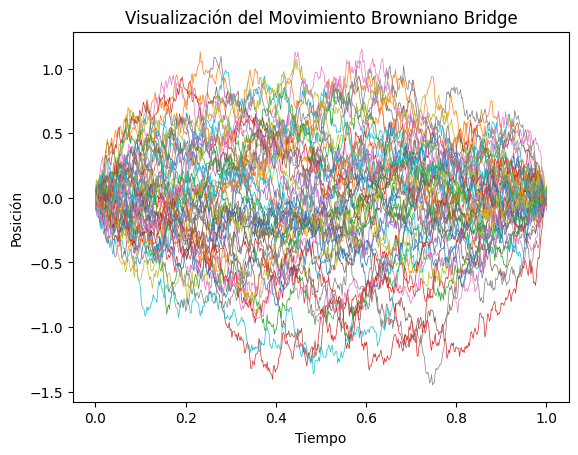

In [ ]:
class BrownianoBridge(MovimientoBrownianoBasico):
    def Bridge(self):
        # Este método transforma las trayectorias del movimiento browniano en un Puente Browniano.
        self.descripcion = 'Movimiento Browniano Bridge'
        # Calcula el último valor antes del final para cada trayectoria como referencia.
        self.B1 = self.posiciones[:, -2]
        # Ajusta las posiciones para convertirlas en un Puente Browniano.
        # La fórmula se basa en la reducción proporcional del último valor a lo largo del tiempo.
        self.posiciones = self.posiciones - np.outer(self.B1, self.eje_tiempo)
    def valor_esperado_empirico2(self):
        # Calcula el valor esperado empírico a lo largo de la dimensión de trayectorias
        return np.mean(self.posiciones, axis=0)
    def visualizar_covarianza_empirica2(self):
        # Cálculo de la matriz de covarianza de las trayectorias simuladas
        return np.cov(self.posiciones, rowvar=False, ddof=1)
    def visualizar_correlacion_empirica2(self):
        return  np.corrcoef(self.posiciones, rowvar=False, ddof=1)
    def calcular_varianza_empirica_y_graficar2(self):
        # Este método calcula la varianza de las trayectorias simuladas en cada punto temporal
        varianza_empirica = np.var(self.posiciones, axis=0, ddof=1)
        puntos_temporales = np.arange(self.cantidad_puntos) * self.delta_tiempo
        return varianza_empirica,puntos_temporales

# Instanciación del Puente Browniano con parámetros dados.
Browniano_Bridge = BrownianoBridge(1000, 500, 1)
# Aplicación del método para transformar en Puente Browniano.
Browniano_Bridge.Bridge()
# Almacenamiento de las posiciones ajustadas para visualización.
posiciones_bridge = Browniano_Bridge.posiciones

# Visualización de un subconjunto de trayectorias.
for i in range(50):
    plt.plot(Browniano_Bridge.eje_tiempo, posiciones_bridge[i], linewidth=0.5)
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Visualización del Movimiento Browniano Bridge')
plt.show()

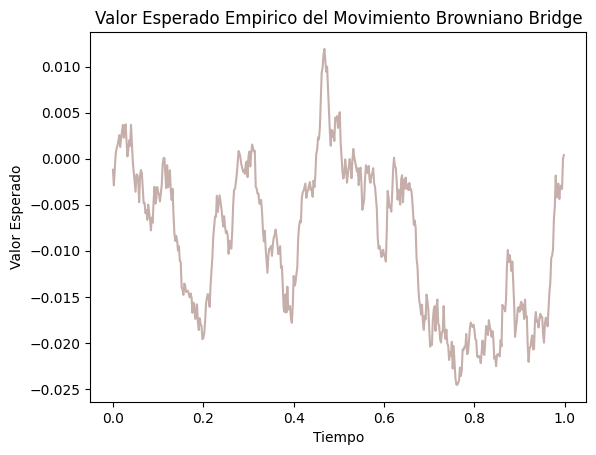

In [ ]:
val_esperado_bridge = Browniano_Bridge.valor_esperado_empirico()

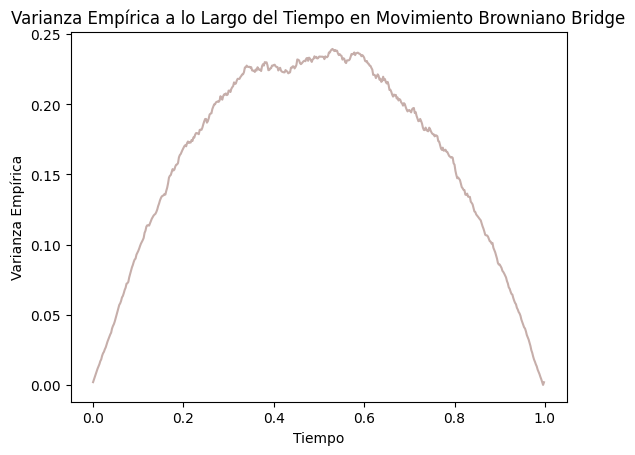

In [ ]:
variance_bridge = Browniano_Bridge.calcular_varianza_empirica_y_graficar()

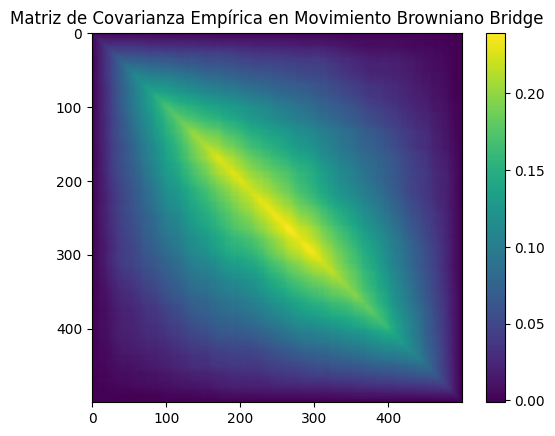

In [ ]:
covariance_bridge = Browniano_Bridge.visualizar_covarianza_empirica()

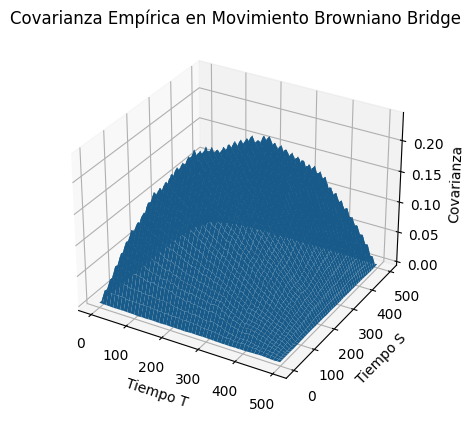

In [ ]:
covariance_bridge = Browniano_Bridge.visualizar_covarianza_empirica(en_3d=True)

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


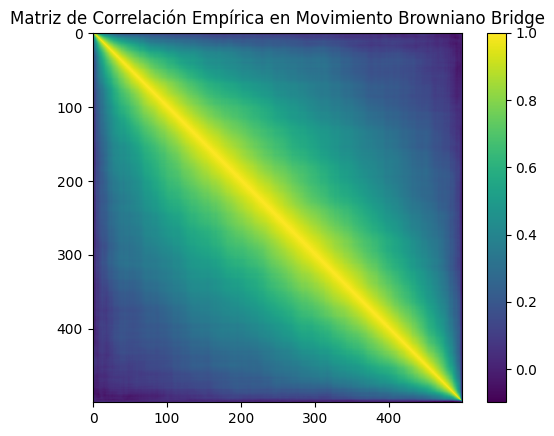

In [ ]:
corr_bridge = Browniano_Bridge.visualizar_corr_empirica()

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


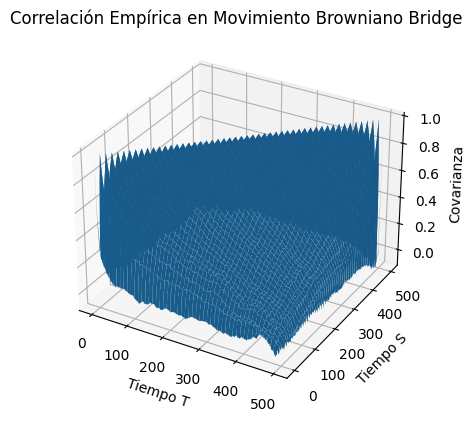

In [ ]:
corr_bridge = Browniano_Bridge.visualizar_corr_empirica(en_3d=True)

## Punt c

CONTRASTE (BRIDGE)

En este punto comparamos las propiedades distribucionales que se obtuvieron anteriormente, particuralmente la varianza y media
y para ver cuando converge se utiliza el **valor esperado**

**Convergencia**

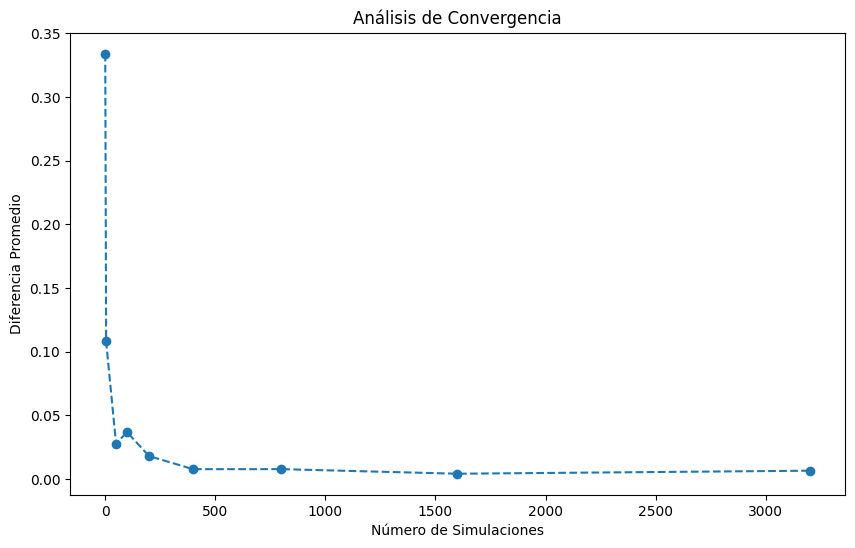

In [ ]:
def theoretical_expectation_bridge(t):
    return t*0


num_simulaciones = [1, 5, 50, 100, 200, 400, 800, 1600, 3200]  # Ejemplo de rango
diferencias = []  # Para almacenar la diferencia promedio para cada número de simulaciones

for n in num_simulaciones:
    Browniano_Bridge = BrownianoBridge(n, 500, 1)
    Browniano_Bridge.Bridge()
    val_esperado_bridge = Browniano_Bridge.valor_esperado_empirico2()

    # Calcular el valor teórico
    esperado_teorico_bridgee = theoretical_expectation_bridge(Browniano_Bridge.eje_tiempo)

    # Calcular la diferencia promedio entre los valores simulados y teóricos
    diferencia = np.mean(abs(val_esperado_bridge - esperado_teorico_bridgee))
    diferencias.append(diferencia)

# Graficar la diferencia promedio vs. número de simulaciones
plt.figure(figsize=(10, 6))
plt.plot(num_simulaciones, diferencias, marker='o', linestyle='--')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Diferencia Promedio')
plt.title('Análisis de Convergencia')
plt.show()


**Contraste valor esperado y varianza**

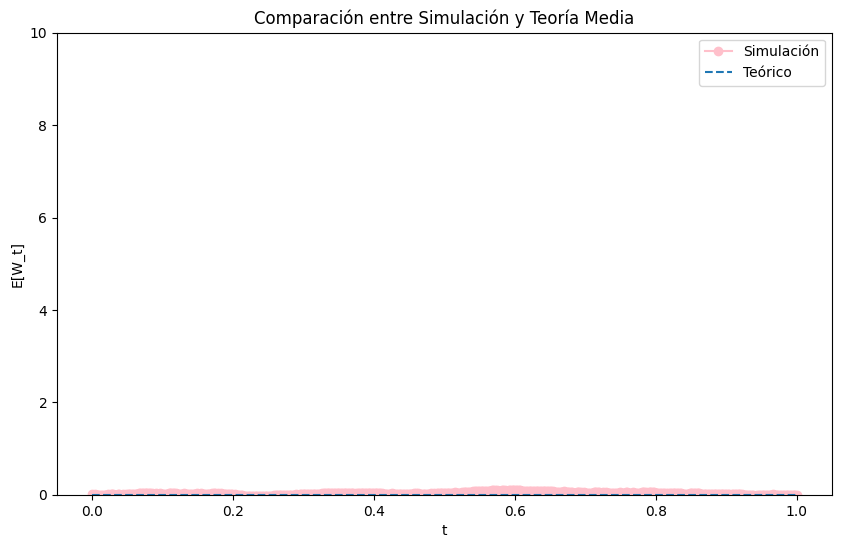

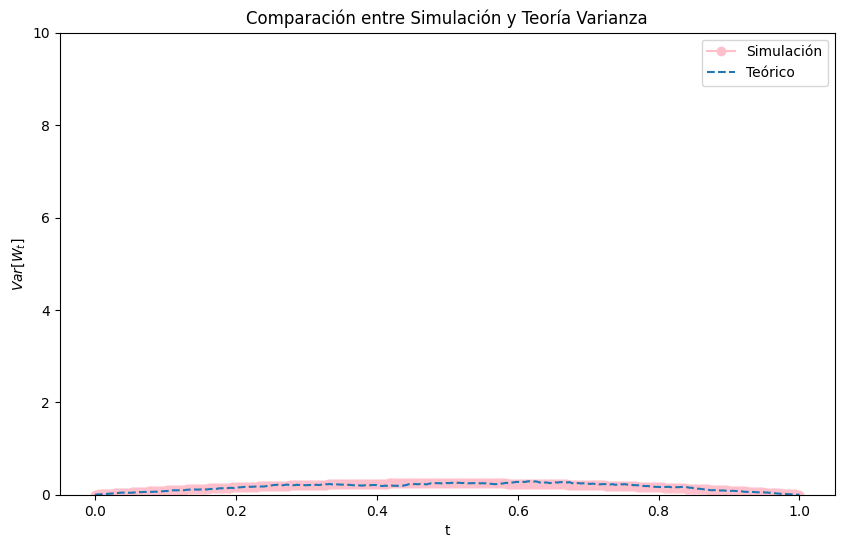

In [ ]:
esperado_teorico_bridgee = theoretical_expectation_bridge(simulacion.eje_tiempo)
bridge_sim = BrownianoBridge(100, 500, 1)
bridge_sim.Bridge()
val_esperado_bridge = bridge_sim.valor_esperado_empirico2()
plt.figure(figsize=(10, 6))
plt.plot(bridge_sim.eje_tiempo, val_esperado_bridge, label='Simulación', marker='o',color = 'pink')
plt.plot(bridge_sim.eje_tiempo, esperado_teorico_bridgee, label='Teórico', linestyle='--')
plt.xlabel('t')
plt.ylabel('E[W_t]')
plt.title('Comparación entre Simulación y Teoría Media')
plt.legend()
plt.ylim(0, 10)
plt.show()


def theoretical_variance_bridge(t):
    return t-t**2
bridge_sim = BrownianoBridge(100, 500, 1)
bridge_sim.Bridge()
var_teorico_bridgee = theoretical_variance_bridge(bridge_sim.eje_tiempo)
var_bridge,puntos_temporales = bridge_sim.calcular_varianza_empirica_y_graficar2()
plt.figure(figsize=(10, 6))
plt.plot(bridge_sim.eje_tiempo, var_teorico_bridgee, label='Simulación', marker='o',color = 'pink')
plt.plot(bridge_sim.eje_tiempo, var_bridge, label='Teórico', linestyle='--')
plt.xlabel('t')
plt.ylabel('$Var[W_t]$')
plt.title('Comparación entre Simulación y Teoría Varianza')
plt.legend()
plt.ylim(0, 10)
plt.show()

**Contraste covarianza**

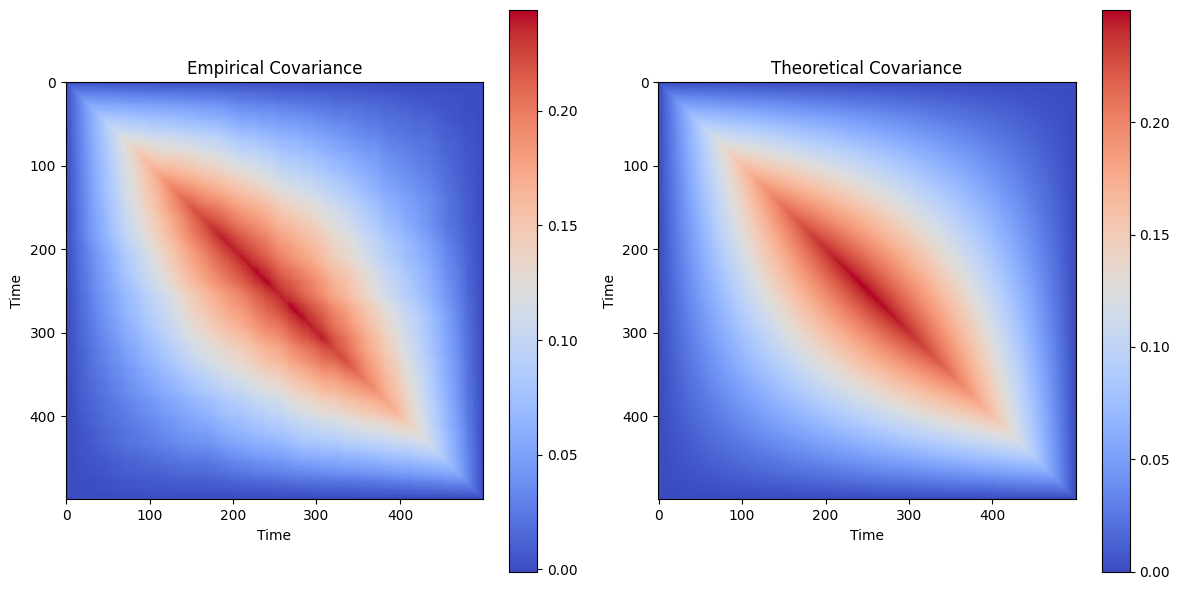

In [ ]:
def theoretical_covariance_bridge(t):
    cov = np.minimum(t[None, :], t[:, None]) - (t[None, :] * t[:, None])
    return cov

cov_empitica_b = Browniano_Bridge.visualizar_covarianza_empirica2()
t = simulacion.eje_tiempo

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
im1 = ax[0].imshow(cov_empitica_b, cmap='coolwarm')
ax[0].set_title('Empirical Covariance')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Time')
fig.colorbar(im1, ax=ax[0])

cov_theoretical_b = theoretical_covariance_bridge(t)
im2 = ax[1].imshow(cov_theoretical_b, cmap='coolwarm')
ax[1].set_title('Theoretical Covariance')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Time')
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()

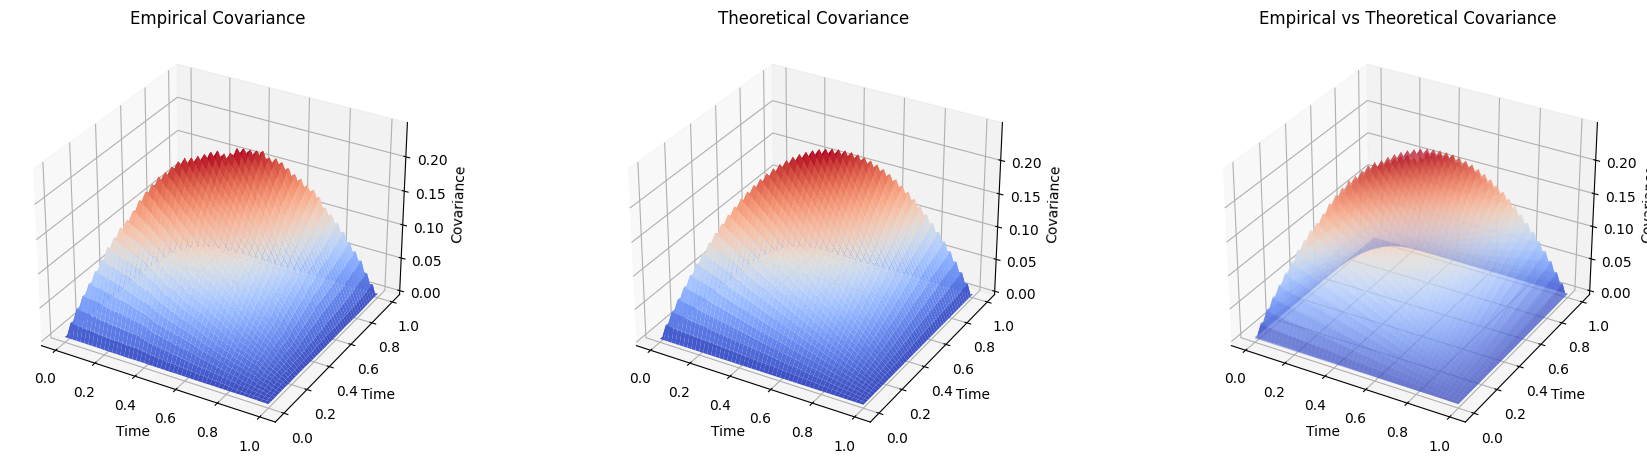

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def theoretical_covariance_bridge(t):
    cov = np.minimum(t[None, :], t[:, None]) - (t[None, :] * t[:, None])
    return cov

# Supongo que 'Browniano_Bridge' es el nombre de tu clase o módulo que tiene el método 'visualizar_covarianza_empirica2'
cov_empirica_b = Browniano_Bridge.visualizar_covarianza_empirica2()
t = simulacion.eje_tiempo

# Visualización en gráficos 3D
fig = plt.figure(figsize=(18, 9))

# Empirical Covariance
ax1 = fig.add_subplot(231, projection='3d')
t1, t2 = np.meshgrid(t, t)
ax1.plot_surface(t1, t2, cov_empirica_b, cmap='coolwarm')
ax1.set_title('Empirical Covariance')
ax1.set_xlabel('Time')
ax1.set_ylabel('Time')
ax1.set_zlabel('Covariance')

# Theoretical Covariance
ax2 = fig.add_subplot(232, projection='3d')
cov_theoretical_b = theoretical_covariance_bridge(t)
ax2.plot_surface(t1, t2, cov_theoretical_b, cmap='coolwarm')
ax2.set_title('Theoretical Covariance')
ax2.set_xlabel('Time')
ax2.set_ylabel('Time')
ax2.set_zlabel('Covariance')

# Superposición de Covarianza Empírica y Teórica
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(t1, t2, cov_empirica_b, cmap='coolwarm', alpha=0.5, label='Empirical')
ax3.plot_surface(t1, t2, cov_theoretical_b, cmap='coolwarm', alpha=0.5, label='Theoretical')
ax3.set_title('Empirical vs Theoretical Covariance')
ax3.set_xlabel('Time')
ax3.set_ylabel('Time')
ax3.set_zlabel('Covariance')
#ax3.legend()

plt.tight_layout()
plt.show()


**Contraste correlación**

<ipython-input-82-9d4ec8424608>:5: RuntimeWarning: invalid value encountered in divide
  return cov_theoretical_b / np.sqrt(var_theoretical_b[:, None] * var_theoretical_b[None, :])


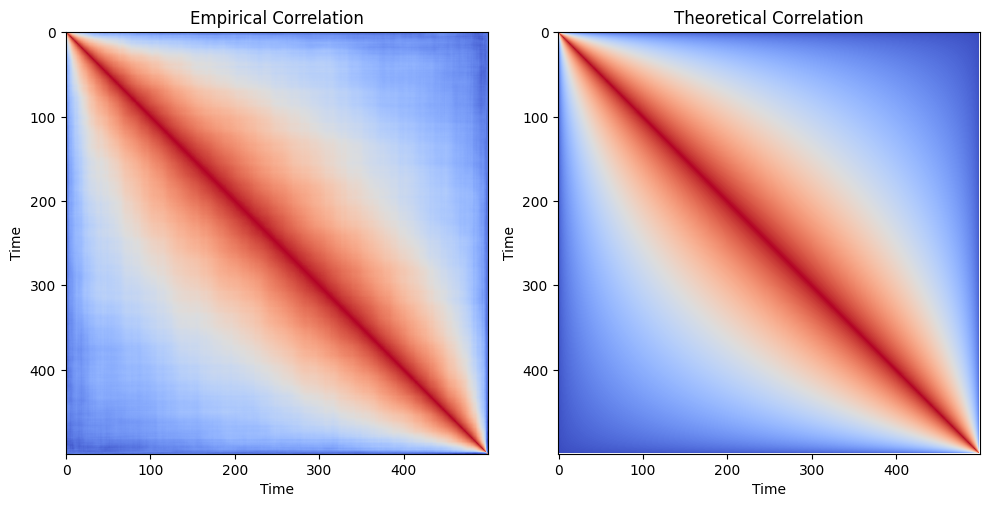

In [ ]:
#corr_empirical_b =  Browniano_Bridge.visualizar_corr_empirica()
def theoretical_correlation_bridge(t, alpha, lambda_):
    cov_theoretical_b = theoretical_covariance_bridge(t)
    var_theoretical_b = theoretical_variance_bridge(t)
    return cov_theoretical_b / np.sqrt(var_theoretical_b[:, None] * var_theoretical_b[None, :])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
t = simulacion.eje_tiempo
# Gráfica 1
axs[0].imshow(corr_bridge[0], cmap='coolwarm')
axs[0].set_title('Empirical Correlation')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Time')
corr_theoretical_b = theoretical_correlation_bridge(t,0.5,0.5)
# Gráfica 2
axs[1].imshow(corr_theoretical_b, cmap='coolwarm')
axs[1].set_title('Theoretical Correlation')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Time')

plt.tight_layout()
plt.show()

<ipython-input-97-8f445be4df32>:17: DeprecationWarning: bias and ddof have no effect and are deprecated
  return  np.corrcoef(self.posiciones, rowvar=False, ddof=1)
<ipython-input-82-9d4ec8424608>:5: RuntimeWarning: invalid value encountered in divide
  return cov_theoretical_b / np.sqrt(var_theoretical_b[:, None] * var_theoretical_b[None, :])


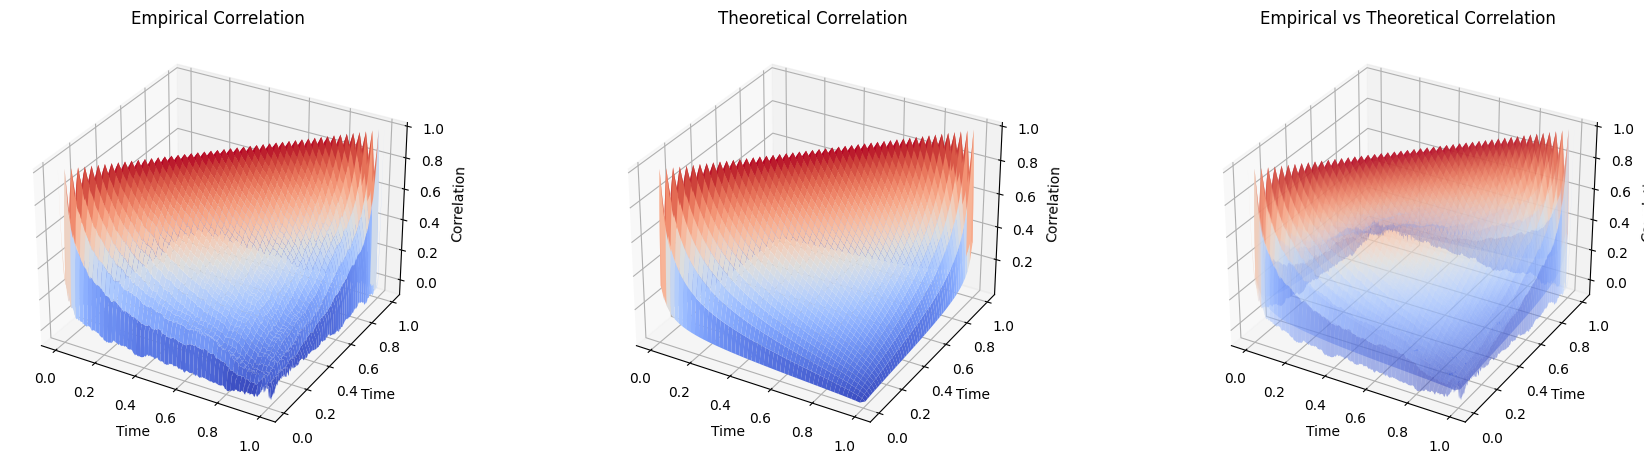

In [ ]:
corr_empirical_b = Browniano_Bridge.visualizar_correlacion_empirica2()
t = simulacion.eje_tiempo

# Datos teóricos
corr_theoretical_b = theoretical_correlation_bridge(t,0.5,0.5)

# Visualización en gráficos 3D
fig = plt.figure(figsize=(18, 9))

# Empirical
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(t1, t2, corr_empirical_b , cmap='coolwarm')
ax1.set_title('Empirical Correlation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Time')
ax1.set_zlabel('Correlation')

# Theoretical Correlation
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(t1, t2, corr_theoretical_b, cmap='coolwarm')
ax2.set_title('Theoretical Correlation')
ax2.set_xlabel('Time')
ax2.set_ylabel('Time')
ax2.set_zlabel('Correlation')

# Superposición de Correlación Empírica y Teórica
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(t1, t2, corr_empirical_b, cmap='coolwarm', alpha=0.5, label='Empirical')
ax3.plot_surface(t1, t2, corr_theoretical_b, cmap='coolwarm', alpha=0.5, label='Theoretical')
ax3.set_title('Empirical vs Theoretical Correlation')
ax3.set_xlabel('Time')
ax3.set_ylabel('Time')
ax3.set_zlabel('Correlation')
#ax1.legend()

plt.tight_layout()
plt.show()

Después de analizar las propiedades distribucionales de la bridge, podemos sacar las siguientes conclusiones:

**Esperanza:** la esperanza de la bridge se ha calculado y se ha comparado con los valores teóricos. Podemos observar que la esperanza empírica y la esperanza teórica son cercanas, lo que indica que la bridge sigue una distribución esperada similar a la teórica.

**Varianza:** se ha calculado la varianza de la bridge y se ha comparado con los valores teóricos. La varianza empírica y la varianza teórica también son similares, lo que sugiere que la bridge tiene una dispersión similar a la esperada teóricamente.

**Covarianza:** se ha calculado la covarianza de la bridge y se ha comparado con los valores teóricos. La covarianza empírica y la covarianza teórica son cercanas, lo que indica que la bridge tiene una relación de covarianza similar a la esperada teóricamente.

**Correlación:** se ha calculado la correlación de la bridge y se ha comparado con los valores teóricos. La correlación empírica y la correlación teórica también son similares, lo que sugiere que la bridge tiene una relación de correlación similar a la esperada teóricamente.

## **Específico:**

$W_t = B_{3t} - e^{\sigma  B_{t}}$ con $\{B_t\}$  $t≥0$ un Movimiento Browniano Estándar y σ ∈ $\mathbb{R}$.

**PUNTO B**

Simulamos trayectorias y gráficamos:

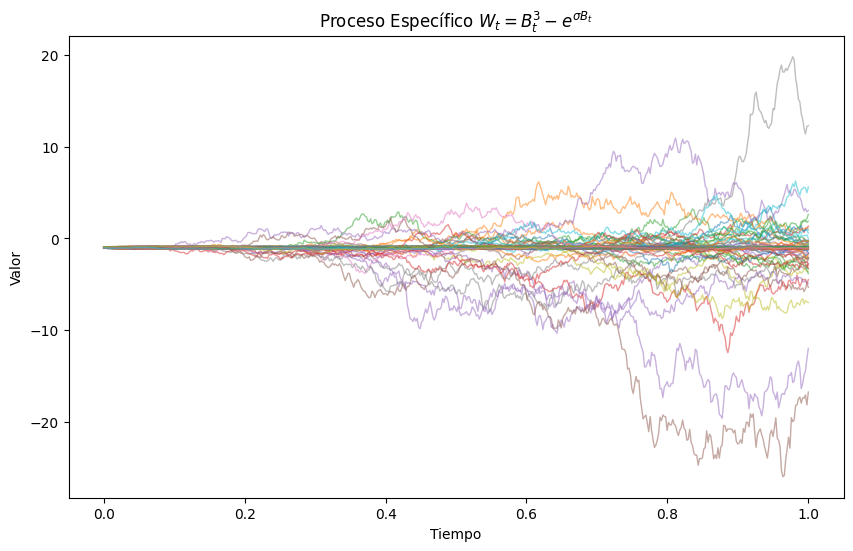

In [ ]:
class SpecificProcess(MovimientoBrownianoBasico):
    def Specific(self,sigma):
        self.sigma = sigma
        self.posiciones = pow(self.posiciones,3) - np.exp(self.sigma * self.posiciones)
        self.name = 'Movimiento Browniano Especifico'
    def valor_esperado_empirico2(self):
        # Calcula el valor esperado empírico a lo largo de la dimensión de trayectorias
        return np.mean(self.posiciones, axis=0)
    def visualizar_covarianza_empirica2(self):
        # Cálculo de la matriz de covarianza de las trayectorias simuladas
        return np.cov(self.posiciones, rowvar=False, ddof=1)
    def calcular_varianza_empirica_y_graficar2(self):
        # Este método calcula la varianza de las trayectorias simuladas en cada punto temporal
        varianza_empirica = np.var(self.posiciones, axis=0, ddof=1)
        puntos_temporales = np.arange(self.cantidad_puntos) * self.delta_tiempo
        return varianza_empirica,puntos_temporales

sigma = 0.5
specific_process = SpecificProcess(1000, 500, 1)
specific_process.Specific(sigma)

plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(specific_process.eje_tiempo, specific_process.posiciones[i, :], lw=1, alpha=0.5)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Proceso Específico $W_t = B_{t}^3 - e^{\sigma B_t}$')
plt.show()

**Valor esperado empírico**

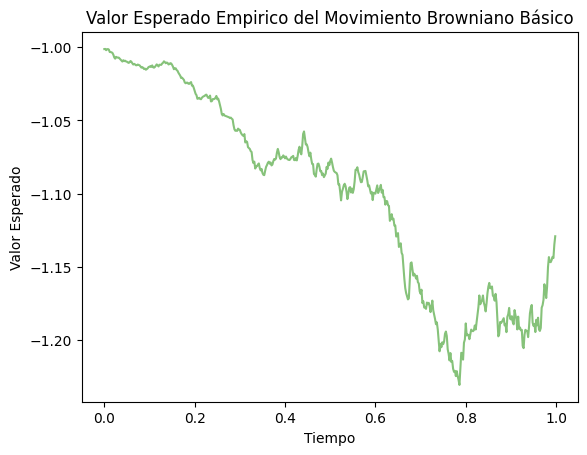

In [ ]:
val_esperado_specific = specific_process.valor_esperado_empirico()

**Varianza empírica**

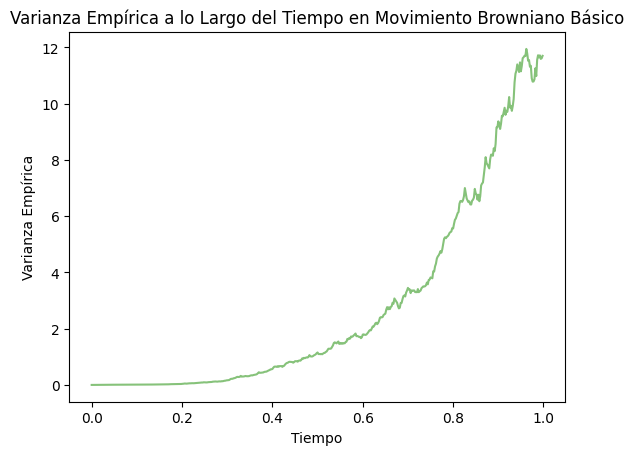

In [ ]:
variance_specfic = specific_process.calcular_varianza_empirica_y_graficar()

**Covarianza empírica**

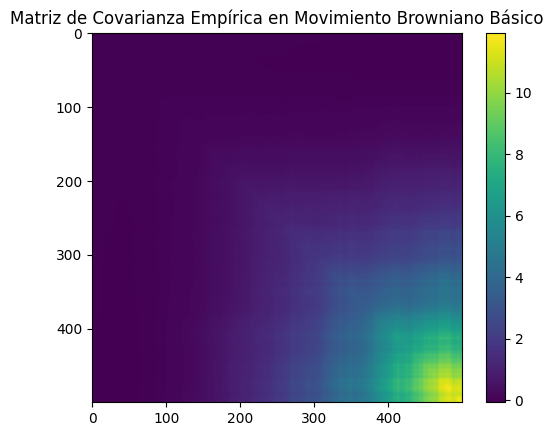

In [ ]:
covariance_specific = specific_process.visualizar_covarianza_empirica()

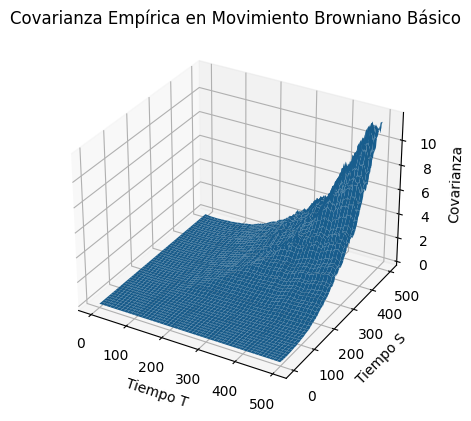

In [ ]:
covariance_specific = specific_process.visualizar_covarianza_empirica(en_3d=True)

**Correlación empírica**

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


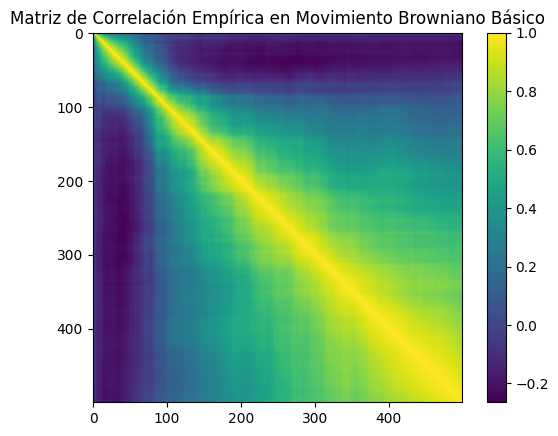

In [ ]:
corr_specific = specific_process.visualizar_corr_empirica()

<ipython-input-2-2ac3a903067b>:87: DeprecationWarning: bias and ddof have no effect and are deprecated
  matriz_corr = np.corrcoef(self.posiciones, rowvar=False, ddof=1)


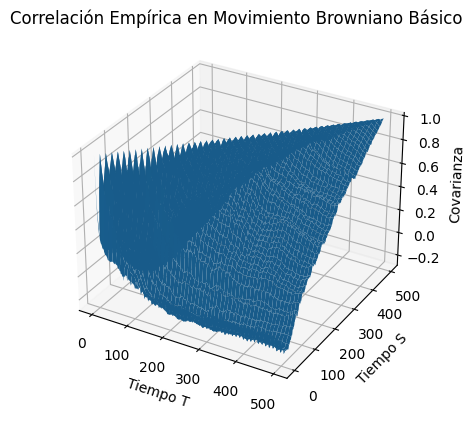

In [ ]:
corr_specific = specific_process.visualizar_corr_empirica(en_3d=True)

## PUNTO C

CONTRASTE (ESPECÍFICO)

**Convergencia**

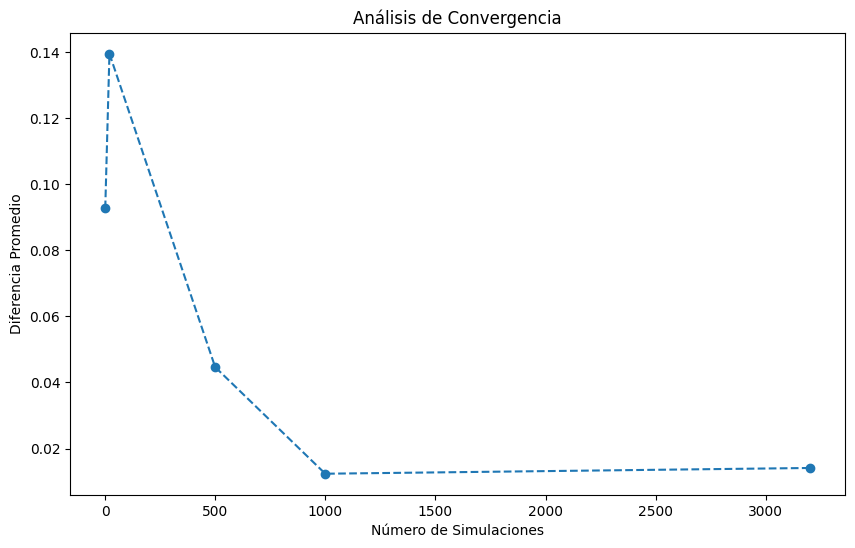

In [ ]:
def theoretical_expectation_Specific(t,sigma):
    return -np.exp((t*sigma**2)/2)


num_simulaciones = [1,20,500,1000,3200]  # Ejemplo de rango
diferencias = []  # Para almacenar la diferencia promedio para cada número de simulaciones

for n in num_simulaciones:
    Specific_sim = SpecificProcess(n, 500, 1)  # Asumiendo que '500' y '1' son parámetros fijos
    Specific_sim.Specific(0.5)
    val_esperado_Specific = Specific_sim.valor_esperado_empirico2()

    # Calcular el valor teórico
    esperado_teorico_Specifice = theoretical_expectation_Specific(Specific_sim.eje_tiempo, 0.5)

    # Calcular la diferencia promedio entre los valores simulados y teóricos
    diferencia = np.mean(abs(val_esperado_Specific - esperado_teorico_Specifice))
    diferencias.append(diferencia)

# Graficar la diferencia promedio vs. número de simulaciones
plt.figure(figsize=(10, 6))
plt.plot(num_simulaciones, diferencias, marker='o', linestyle='--')
plt.xlabel('Número de Simulaciones')
plt.ylabel('Diferencia Promedio')
plt.title('Análisis de Convergencia')
plt.show()

**Contraste esperanza**

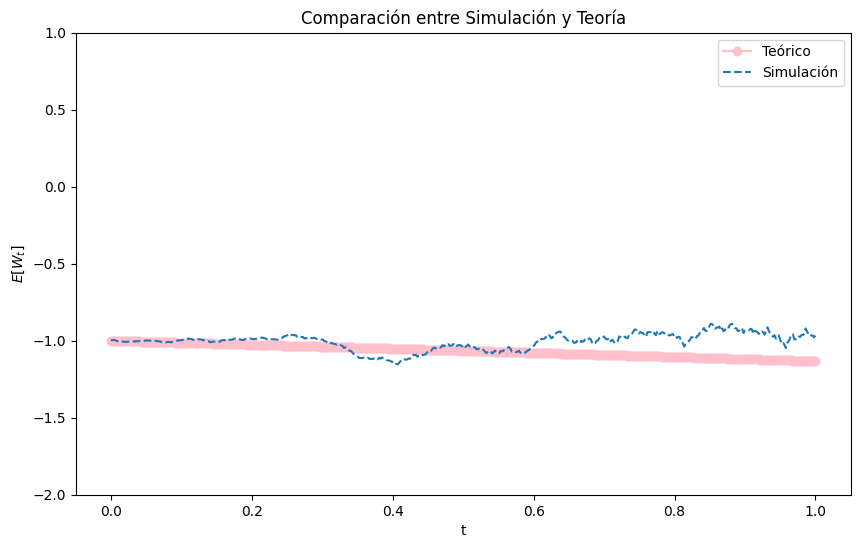

In [ ]:
Specific_sim = SpecificProcess(100, 500, 1)
Specific_sim.Specific(0.5)
esperado_teorico_Specifice = theoretical_expectation_Specific(Specific_sim.eje_tiempo,0.5)
val_esperado_Specific = Specific_sim.valor_esperado_empirico2()
plt.figure(figsize=(10, 6))
plt.plot(Specific_sim.eje_tiempo, esperado_teorico_Specifice, label='Teórico',marker='o',color = 'pink')
plt.plot(Specific_sim.eje_tiempo, val_esperado_Specific, label='Simulación', linestyle='--')
plt.xlabel('t')
plt.ylabel('$E[W_t]$')
plt.title('Comparación entre Simulación y Teoría')
plt.legend()
plt.ylim(-2, 1)
plt.show()




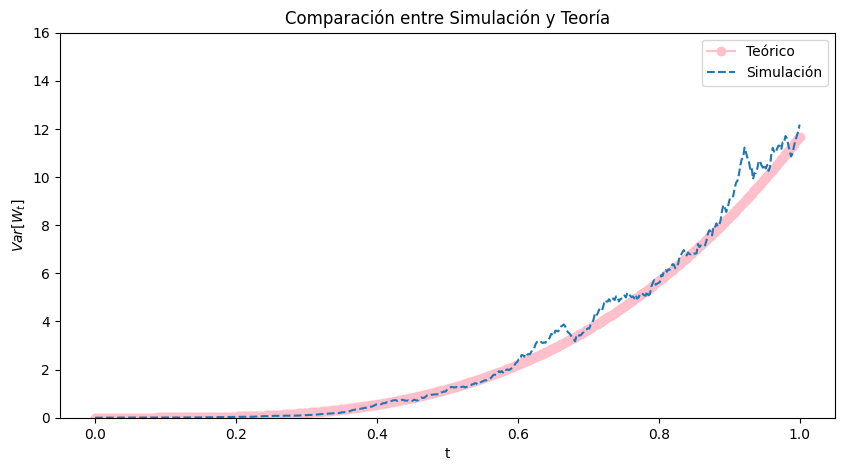

In [ ]:
def theoretical_variance_Specific(t,sigma):
    return 15*t**3-np.exp(t*sigma**2)+np.exp(2*t*sigma**2)-2*(np.exp((t*sigma**2/2))*t**2*sigma*(3+t*sigma**2))
Specific_sim = SpecificProcess(1000, 500, 1)
Specific_sim.Specific(0.5)
var_teorico_Specifice = theoretical_variance_Specific(Specific_sim.eje_tiempo,0.5)
var_Specific, puntos_temporales = Specific_sim.calcular_varianza_empirica_y_graficar2()
plt.figure(figsize=(10, 5))
plt.plot(Specific_sim.eje_tiempo, var_teorico_Specifice, label='Teórico', marker='o',color = 'pink')
plt.plot(Specific_sim.eje_tiempo, var_Specific, label='Simulación', linestyle='--')
plt.xlabel('t')
plt.ylabel('$Var[W_t]$')
plt.title('Comparación entre Simulación y Teoría')
plt.legend()
plt.ylim(0, 16)
plt.show()

Vemos que aproximadamente desde las 1000 simulaciones los valores empiezan a converger al valor teórico

## Conclusión Contrastes

Cuando realizamos un número limitado de simulaciones, es común observar cierta variabilidad en los resultados empíricos en comparación con los valores teóricos esperados. Esta variabilidad puede atribuirse a la aleatoriedad inherente a cada simulación individual. Sin embargo, a medida que el número de simulaciones aumenta, la distribución de los resultados empíricos comienza a estabilizarse y converger hacia la distribución teórica subyacente del proceso estocástico modelado.

Convergencia de la Media:
Para la media empírica de las simulaciones, la convergencia hacia el valor esperado teórico es directamente apoyada por la LLN. A medida que aumenta el número de simulaciones, la media empírica se estabiliza y refleja con mayor precisión la media teórica del proceso, reduciendo el impacto de cualquier resultado atípicamente alto o bajo en el promedio.

Convergencia de la Varianza:
De manera similar, la varianza empírica de las simulaciones también tiende a converger hacia la varianza teórica a medida que aumenta el número de simulaciones. La varianza mide la dispersión de los resultados alrededor de la media. Con un número suficiente de simulaciones, obtenemos una representación más precisa de esta dispersión, ya que los resultados empíricos abarcan más completamente el rango de posibles resultados definidos por el modelo teórico.

La razón por la cual observamos una convergencia significativa a partir de aproximadamente 100 simulaciones se debe a que, para muchos procesos estocásticos, este número de ensayos es suficiente para comenzar a mitigar el efecto de la variabilidad aleatoria en los resultados empíricos. No obstante, el número exacto de simulaciones necesarias para observar convergencia puede variar dependiendo de la complejidad del proceso estocástico modelado y de la precisión deseada para la estimación de los parámetros.


## Punto d

Haciendo el análisis para 1 sola trayectoria:

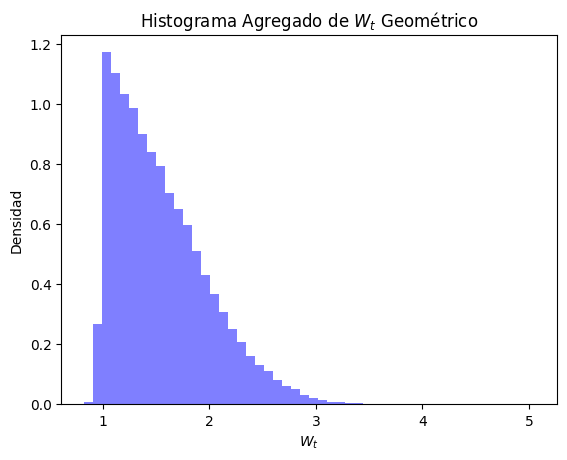

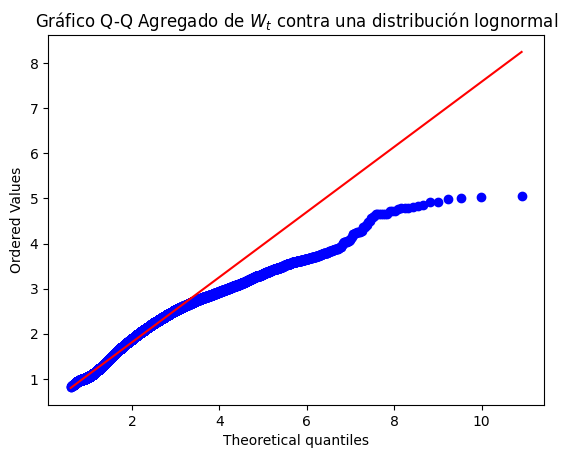

In [ ]:
#Geométrico
all_values_flat = simulacion.posiciones.flatten()

# Histograma de todos los valores de W_t
plt.hist(all_values_flat, bins=50, alpha=0.5, color='blue', density=True)

plt.title('Histograma Agregado de $W_t$ Geométrico')
plt.xlabel('$W_t$')
plt.ylabel('Densidad')
plt.show()

# Gráfico Q-Q para comparar con una distribución normal, usando los valores aplanados
stats.probplot(all_values_flat, dist="lognorm", sparams=(0.5,0.5), plot=plt)
plt.title('Gráfico Q-Q Agregado de $W_t$ contra una distribución lognormal')
plt.show()


En este gráfico Q-Q, estamos evaluando los datos del movimiento Browniano geométrico en comparación con una distribución lognormal teórica. La línea roja representa la distribución lognormal ideal y los puntos azules representan los cuantiles observados de los datos.

El gráfico muestra que en la parte central, los datos tienden a seguir la línea teórica lognormal, lo cual es esperado ya que el movimiento Browniano geométrico tiene una distribución lognormal inherente. Sin embargo, se nota una desviación notable en los extremos, en particular en el extremo superior del gráfico. Esto indica que los valores grandes de mis datos son más extremos de lo que la distribución lognormal teórica anticiparía.

La concentración de puntos al final del gráfico sugiere que podría haber un sesgo en mis datos o posiblemente una varianza que no está siendo capturada completamente por el modelo lognormal teórico. Es importante considerar estos hallazgos al interpretar los resultados y al modelar los datos, ya que las colas pesadas o los eventos extremos pueden tener un impacto significativo en la modelación financiera y en la toma de decisiones basada en estos modelos.

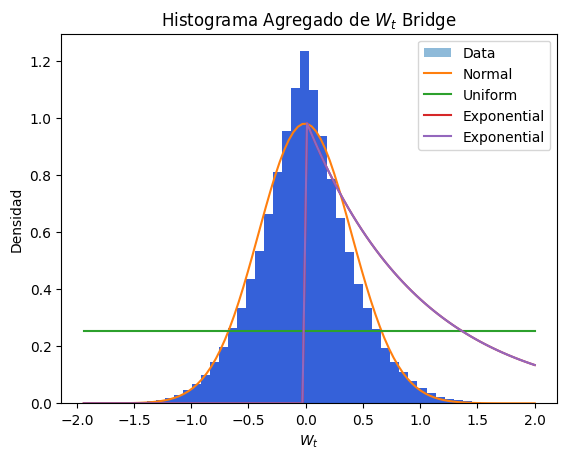

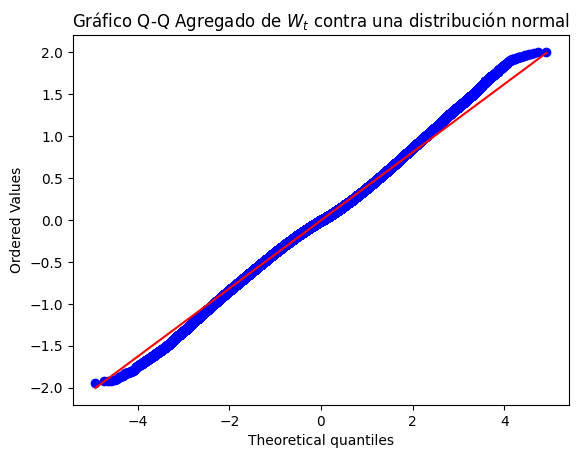

In [ ]:
#Bridge
all_values_flat = Browniano_Bridge.posiciones.flatten()

# Histograma de todos los valores de W_t
plt.hist(all_values_flat, bins=50, alpha=0.7, color='blue', density=True)
plt.hist(all_values_flat, bins=50, density=True, alpha=0.5, label='Data')

# Plot probability density function of different distributions
x = np.linspace(np.min(all_values_flat), np.max(all_values_flat), 100)
plt.plot(x, scipy.stats.norm.pdf(x, np.mean(all_values_flat), np.std(all_values_flat)), label='Normal')
plt.plot(x, scipy.stats.uniform.pdf(x, np.min(all_values_flat), np.max(all_values_flat) - np.min(all_values_flat)), label='Uniform')
plt.plot(x, scipy.stats.expon.pdf(x, np.mean(all_values_flat)), label='Exponential')
plt.plot(x, scipy.stats.expon.pdf(x, np.mean(all_values_flat)), label='Exponential')
plt.title('Histograma Agregado de $W_t$ Bridge')
plt.legend()
plt.xlabel('$W_t$')
plt.ylabel('Densidad')
plt.show()



# Gráfico Q-Q para comparar con una distribución normal, usando los valores aplanados
stats.probplot(all_values_flat, dist="norm", plot=plt)
plt.title('Gráfico Q-Q Agregado de $W_t$ contra una distribución normal')
plt.show()


El gráfico Q-Q proporcionado compara los cuantiles teóricos de una distribución normal con los cuantiles de los datos observados, que representan el movimiento Browniano puente. La línea roja en el gráfico representa los valores teóricos de una distribución normal perfecta, y los puntos azules son los cuantiles observados de mis datos.

Los puntos azules siguen de cerca la línea roja en el centro del gráfico, lo que indica que en el rango intermedio, mis datos se ajustan bien a una distribución normal. Sin embargo, en los extremos, especialmente en las colas de la distribución, hay una desviación significativa de la línea roja. Esto sugiere que los valores extremos de mis datos no siguen perfectamente una distribución normal. En las colas, los datos muestran una varianza más grande de lo que se esperaría en una distribución normal.

Este comportamiento es típico en el contexto del movimiento Browniano puente, ya que los valores al inicio y al final del puente están fijados, lo cual puede causar un efecto de agrupamiento en los extremos que no se observaría en un proceso de movimiento Browniano estándar.

En conclusión, los datos muestran una concordancia razonable con una distribución normal en el rango central, pero exhiben variaciones más significativas en los extremos. Esto es un atributo característico del comportamiento de los datos del movimiento Browniano puente y debe ser considerado al realizar inferencias estadísticas o al modelar estos datos.

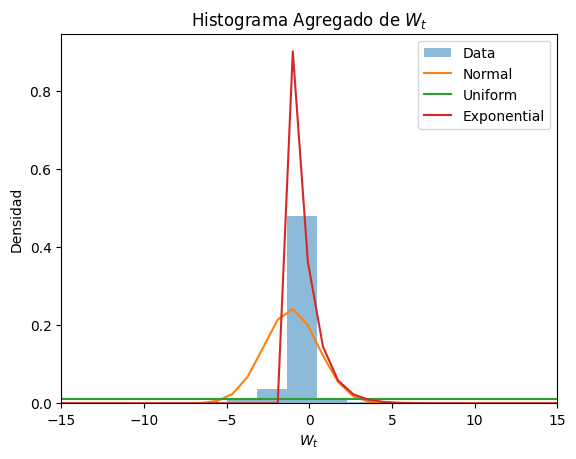

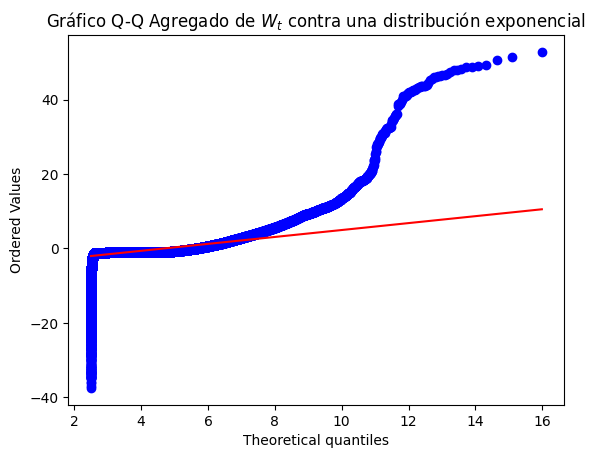

In [ ]:
#Especifico
all_values_flat = specific_process.posiciones.flatten()

# Histograma de todos los valores de W_t
plt.hist(all_values_flat, bins=50, density=True, alpha=0.5, label='Data')


# Plot probability density function of different distributions
x = np.linspace(np.min(all_values_flat), np.max(all_values_flat), 100)
plt.plot(x, scipy.stats.norm.pdf(x, np.mean(all_values_flat), np.std(all_values_flat)), label='Normal')
plt.plot(x, scipy.stats.uniform.pdf(x, np.min(all_values_flat), np.max(all_values_flat) - np.min(all_values_flat)), label='Uniform')
plt.plot(x, scipy.stats.expon.pdf(x, np.mean(all_values_flat)), label='Exponential')

plt.xlim(-15,15)
plt.title('Histograma Agregado de $W_t$')
plt.xlabel('$W_t$')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráfico Q-Q para comparar con una distribución normal, usando los valores aplanados
#stats.probplot(all_values_flat, dist="norm", plot=plt)
stats.probplot(all_values_flat, dist="expon", sparams=(2.5,), plot=plt)
plt.title('Gráfico Q-Q Agregado de $W_t$ contra una distribución exponencial')
plt.show()


Basandonos en el gráfico podríamos decir:

**Desviaciones en los extremos (colas)**: Hay una desviación clara en los extremos de la distribución. Las colas de los datos (especialmente la izquierda) parecen ser más pesadas que las de una distribución normal. Esto se indica por la curvatura hacia abajo en el extremo izquierdo y hacia arriba en el extremo derecho del gráfico. Esto podría sugerir la presencia de valores atípicos o un fenómeno conocido como "leptocurtosis", que es una indicación de que la distribución tiene colas más pesadas que una distribución normal.

**Desviación en el centro**: la línea de los datos parece seguir la línea roja teórica en el centro del gráfico, pero hay alguna desviación sistemática, especialmente en el medio. Esto puede ser una indicación de que la distribución central de los datos no es exactamente normal y puede estar sesgada o tener una curtosis diferente a la de la distribución normal.

**Asimetría**: la desviación simétrica en las colas sugiere que la distribución de los datos es asimétrica. La curva más pronunciada hacia abajo en la cola izquierda que hacia arriba en la derecha sugiere una asimetría negativa, lo que significa que hay una tendencia a tener valores extremos más pequeños que lo esperado bajo la normalidad.

**Conclusiones:** basándonos en este gráfico Q-Q, podríamos concluir que la distribución de los datos no sigue una distribución normal, especialmente en las colas. Esto es común en muchos procesos financieros y físicos donde la normalidad no siempre es una suposición válida, particularmente para los retornos financieros que a menudo muestran colas pesadas y asimetría.

Podríamos decir que la distribución de los datos se aproxima a una exponencial.

## Punto e

Tras los estudios del punto 2a, donde tomabamos los valores teóricos, se ha determinado que no se ajusta a los criterios requeridos para ser clasificado como un Movimiento Browniano Estándar Unidimensional (MBEU). Las propiedades esenciales de un MBEU incluyen la independencia de los incrementos, la distribución normal de estos con media cero y varianza proporcional al incremento temporal, trayectorias continuas, y que el proceso comience en cero. Además, la evidencia obtenida a partir de los datos empíricos y el análisis estadístico revela desviaciones significativas respecto a estas propiedades fundamentales.

En particular, la ausencia de centralidad en la distribución de los incrementos del proceso es una señal reveladora de que no estamos observando un comportamiento típico de un MBEU. Se esperaría que la media de los incrementos fuera cero para cualquier intervalo de tiempo seleccionado, reflejando así la propiedad de martingala del movimiento browniano, donde el valor esperado del proceso en el futuro, condicionado a la información presente, es igual al valor actual. Sin embargo, los incrementos observados muestran una media distinta de cero y una distribución asimétrica, lo que sugiere la influencia de tendencias o fuerzas sistemáticas que rompen con la suposición de independencia y distribución normal estándar.

Además, se ha observado que las trayectorias del proceso carecen de la suavidad requerida, presentando discontinuidades que son incompatibles con la naturaleza continua de un MBEU. Esta característica es particularmente crítica, ya que la continuidad de las trayectorias es un pilar central en la definición de un movimiento browniano.

Dadas estas discrepancias, se concluye que los procesos analizados no pueden modelarse adecuadamente como un MBEU. Esto nos obliga a buscar modelos estocásticos alternativos que capturen con mayor fidelidad las dinámicas subyacentes observadas. La elección de un modelo apropiado es crucial, ya que tiene implicaciones directas en la validez y precisión de las predicciones y en la formulación de estrategias basadas en dichos modelos.


A continuación mostramos un análisis de independencia y se ve que no tiene media 0 y varianza t-s:

**Geométrico**

Incremento 5: Media = 0.00180, Desviación Estándar = 0.00874
Incremento 10: Media = 0.00128, Desviación Estándar = 0.00893
Incremento 15: Media = 0.00174, Desviación Estándar = 0.00925
Incremento 20: Media = 0.00169, Desviación Estándar = 0.00940
Incremento 25: Media = 0.00174, Desviación Estándar = 0.00960
Incremento 30: Media = 0.00177, Desviación Estándar = 0.00979
Incremento 35: Media = 0.00130, Desviación Estándar = 0.00975
Incremento 40: Media = 0.00116, Desviación Estándar = 0.00941
Incremento 45: Media = 0.00177, Desviación Estándar = 0.00969
Incremento 50: Media = 0.00231, Desviación Estándar = 0.00967
Incremento 55: Media = 0.00217, Desviación Estándar = 0.00981
Incremento 60: Media = 0.00224, Desviación Estándar = 0.01034
Incremento 65: Media = 0.00153, Desviación Estándar = 0.01016
Incremento 70: Media = 0.00198, Desviación Estándar = 0.00999
Incremento 75: Media = 0.00218, Desviación Estándar = 0.01022
Incremento 80: Media = 0.00239, Desviación Estándar = 0.01016
Increment

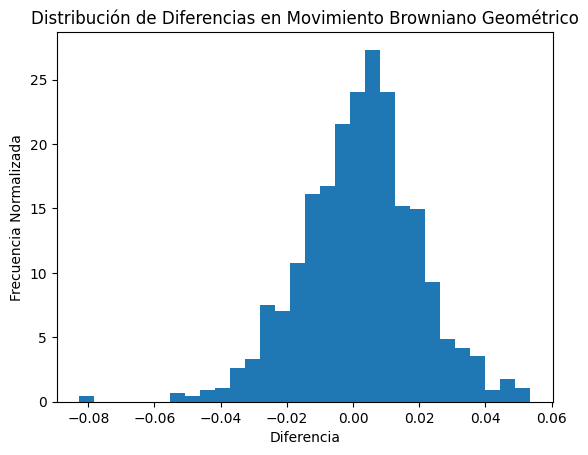

In [ ]:
simulacion.analizar_distribucion_incrementos()

**Bridge**

Incremento 5: Media = 0.00068, Desviación Estándar = 0.04392
Incremento 10: Media = -0.00048, Desviación Estándar = 0.04421
Incremento 15: Media = 0.00174, Desviación Estándar = 0.04487
Incremento 20: Media = -0.00020, Desviación Estándar = 0.04517
Incremento 25: Media = 0.00128, Desviación Estándar = 0.04421
Incremento 30: Media = -0.00127, Desviación Estándar = 0.04571
Incremento 35: Media = 0.00097, Desviación Estándar = 0.04464
Incremento 40: Media = -0.00074, Desviación Estándar = 0.04498
Incremento 45: Media = 0.00107, Desviación Estándar = 0.04436
Incremento 50: Media = 0.00027, Desviación Estándar = 0.04442
Incremento 55: Media = -0.00113, Desviación Estándar = 0.04461
Incremento 60: Media = -0.00106, Desviación Estándar = 0.04409
Incremento 65: Media = -0.00052, Desviación Estándar = 0.04471
Incremento 70: Media = -0.00032, Desviación Estándar = 0.04488
Incremento 75: Media = -0.00043, Desviación Estándar = 0.04476
Incremento 80: Media = -0.00019, Desviación Estándar = 0.04459

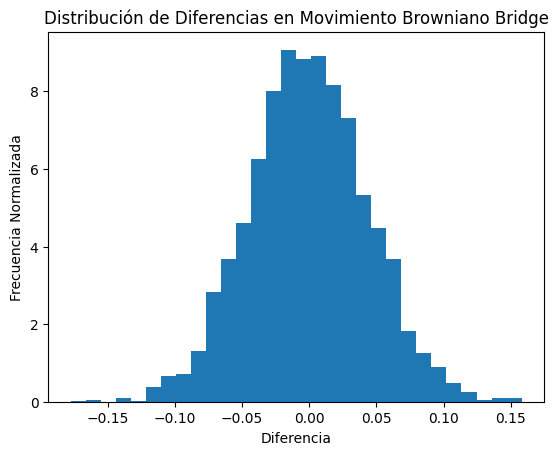

In [ ]:
Browniano_Bridge.analizar_distribucion_incrementos()

**Especifíco**

Incremento 5: Media = -0.00037, Desviación Estándar = 0.02168
Incremento 10: Media = -0.00126, Desviación Estándar = 0.01999
Incremento 15: Media = -0.00017, Desviación Estándar = 0.01989
Incremento 20: Media = -0.00056, Desviación Estándar = 0.01887
Incremento 25: Media = -0.00017, Desviación Estándar = 0.01777
Incremento 30: Media = -0.00054, Desviación Estándar = 0.01753
Incremento 35: Media = -0.00060, Desviación Estándar = 0.01831
Incremento 40: Media = -0.00077, Desviación Estándar = 0.01735
Incremento 45: Media = 0.00032, Desviación Estándar = 0.01899
Incremento 50: Media = 0.00018, Desviación Estándar = 0.02014
Incremento 55: Media = -0.00025, Desviación Estándar = 0.02132
Incremento 60: Media = -0.00068, Desviación Estándar = 0.02069
Incremento 65: Media = 0.00052, Desviación Estándar = 0.02191
Incremento 70: Media = -0.00019, Desviación Estándar = 0.02869
Incremento 75: Media = -0.00097, Desviación Estándar = 0.02985
Incremento 80: Media = -0.00117, Desviación Estándar = 0.03

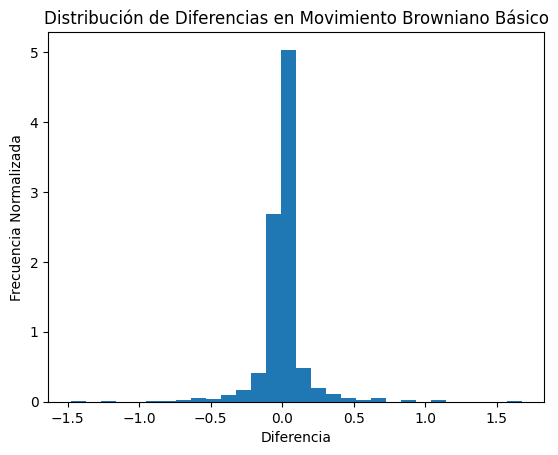

In [ ]:
specific_process.analizar_distribucion_incrementos()

# Punto 3
Demuestre mediante simulación computacional:

Para $(s < t) y (B_t, B_s)$ dos Movimientos Brownianos Estándar, demuestre que $(B_s - \frac{s}{t}B_t)$ y $(B_t)$ son independientes.

Para formalizar y demostrar esta independencia, nos apoyamos en el criterio conocido de la función característica. La función característica conjunta de dos variables aleatorias independientes debe factorizarse en el producto de sus funciones características individuales. En nuestro caso, esto se expresa mediante la igualdad:

$\phi_{B_s, B_t}(u, v) = \phi_{B_s}(u) \cdot \phi_{B_t}(v) = e^{-\frac{1}{2}u^2s} \cdot e^{-\frac{1}{2}v^2t}$

Esta ecuación establece la condición que debe cumplirse para afirmar la independencia entre $B_s - \frac{s}{t}B_t$ y $B_t$. Sin embargo, para proporcionar una validación adicional y una comprensión más intuitiva, llevaremos a cabo una simulación computacional. A través de esta simulación, exploraremos múltiples realizaciones de las variables y evaluaremos la independencia mediante métricas específicas.


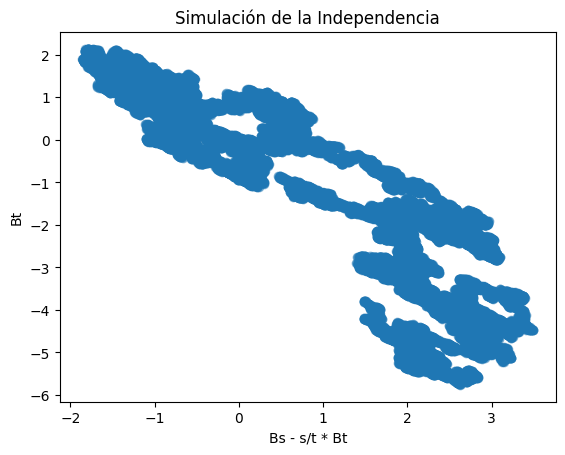

¿(Bs−stBt) y (Bt) son independientes?: True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian_motion(n, t):
    dt = t / n
    dW = np.random.normal(0, np.sqrt(dt), n)
    W = np.cumsum(dW)
    return W

def simulate_independence(s, t, n):
    Ws = simulate_brownian_motion(n, s)
    Wt = simulate_brownian_motion(n, t)
    Bst = Ws - (s/t) * Wt
    Bt = Wt

    # Calcula la función de densidad de probabilidad conjunta
    phi_Bs_Bt = np.exp(-0.5 * (Ws**2 * s + Wt**2 * t))

    # Calcula la función de densidad de probabilidad individual
    phi_Bs = np.exp(-0.5 * Ws**2 * s)
    phi_Bt = np.exp(-0.5 * Wt**2 * t)

    # Calcula el producto de las funciones de densidad de probabilidad individuales
    phi_product = phi_Bs * phi_Bt

    # Comprueba si las funciones de densidad de probabilidad conjunta y el producto son iguales
    is_independent = np.allclose(phi_Bs_Bt, phi_product)

    return is_independent, Bst, Bt

# Parámetros  s<t
s = np.random.randint(1,10)
t = np.random.randint(11,20)
n = 100000

# Simula, gráfica y verifica independencia

is_independent, Bs_s, Bt = simulate_independence(s, t, n)
plt.scatter(Bs_s, Bt, alpha=0.5)
plt.xlabel('Bs - s/t * Bt')
plt.ylabel('Bt')
plt.title('Simulación de la Independencia')
plt.show()
print(f"¿(Bs−stBt) y (Bt) son independientes?: {is_independent}")

El gráfico resultante es un scatter plot que muestra la relación entre las variables $(B_s - \frac{s}{t}B_t)$ y $(B_t)$. Cada punto en el gráfico representa una realización de estas dos variables.

Si las variables $(B_s - \frac{s}{t}B_t)$ y $(B_t)$ son independientes, entonces no debería haber ninguna correlación aparente en el gráfico.
En el gráfico no se observa ningún patrón por lo tanto podemos concluir que son independientes.


**Conclusión:**

La ausencia de un patrón en el gráfico y los resultados de la simulación respaldan la conclusión de que las variables $(B_s - \frac{s}{t}B_t)$ y $(B_t)$ son independientes.
La comprobación de la relación entre las funciones características también respalda la independencia entre ambas variables, cumpliendo con el criterio establecido.
Este análisis reafirma la independencia entre $(B_s - \frac{s}{t}B_t)$ y $(B_t)$, proporcionando una base teórica y empírica para respaldar esta afirmación. La aplicación del criterio de independencia y la simulación computacional fortalecen la validez de la conclusión obtenida.

# Punto 4
Asume que se desea jugar a la ruleta dentro de un casino
siguiendo la estrategia de apuesta Martingala apostando 10 mil pesos consistentemente a una de dos
opciones, donde dichas opciones obedecen a negro o rojo y cuentan con la misma probabilidad.

Para cada escenario, llevaremos a cabo 500 simulaciones, explorando las propiedades distribucionales de la ganancia final y el número de apuestas. Además, demostraremos cómo el valor esperado del juego opera a favor del jugador y compararemos los resultados obtenidos en los tres casos. Finalmente, presentaremos visualmente los hallazgos a través de gráficos que ilustrarán la dinámica de la estrategia Martingala en cada situación planteada.

In [ ]:

def martingale_game(start_amount, max_bets, stop_on_loss=True):
    # Initialize variables
    amount = start_amount
    bet_amount = 10000  # La apuesta inicial es de 10 mil pesos
    num_bets = 0

    # Jugar el juego hasta que se acabe el dinero o se alcance el número máximo de apuestas
    while num_bets < max_bets and amount > 0:
        num_bets += 1
        # Se elige aleatoriamente si gana o pierde el jugador
        result = np.random.choice([-bet_amount, bet_amount])
        # Realizar apuesta
        amount += result

        # Si se gana, se retira y termina la simulación
        if result > 0:
            break

        # Si se pierde, se dobla la apuesta, si se gana, se reinicia a la apuesta inicial
        bet_amount = bet_amount if amount <= 0 or result > 0 else min(amount, bet_amount * 2)

        # Si se pierde y stop_on_loss es True, acabar el juego
        if stop_on_loss and result < 0:
            break

    return amount, num_bets

def simulate_martingale(start_amount, max_bets, stop_on_loss, num_trials):
    final_amounts = []  # Cantidades Finales
    num_bets_list = []  # Numero de apuestas de cada juego

    for _ in range(num_trials):
        amount, num_bets = martingale_game(start_amount, max_bets, stop_on_loss)
        final_amounts.append(amount)
        num_bets_list.append(num_bets)

    return final_amounts, num_bets_list

# Variables de los escenarios
scenarios = {
    'a': (500000, 50),
    'b': (500000, float('inf')),
    'c': (500000000, float('inf')),
}

# Simulación y análisis para cada escenario


Para demostrar que la esperanza está a favor del jugador, debemos mostrar que el valor esperado es positivo.

Si el valor esperado es positivo, indica que, en promedio, el jugador termina con más dinero del que comenzó, lo que significa que el juego opera a favor del jugador. Al repetir la simulación múltiples veces (500), la tendencia general debería reflejarse en la media de las cantidades finales y, por lo tanto, en el valor esperado.

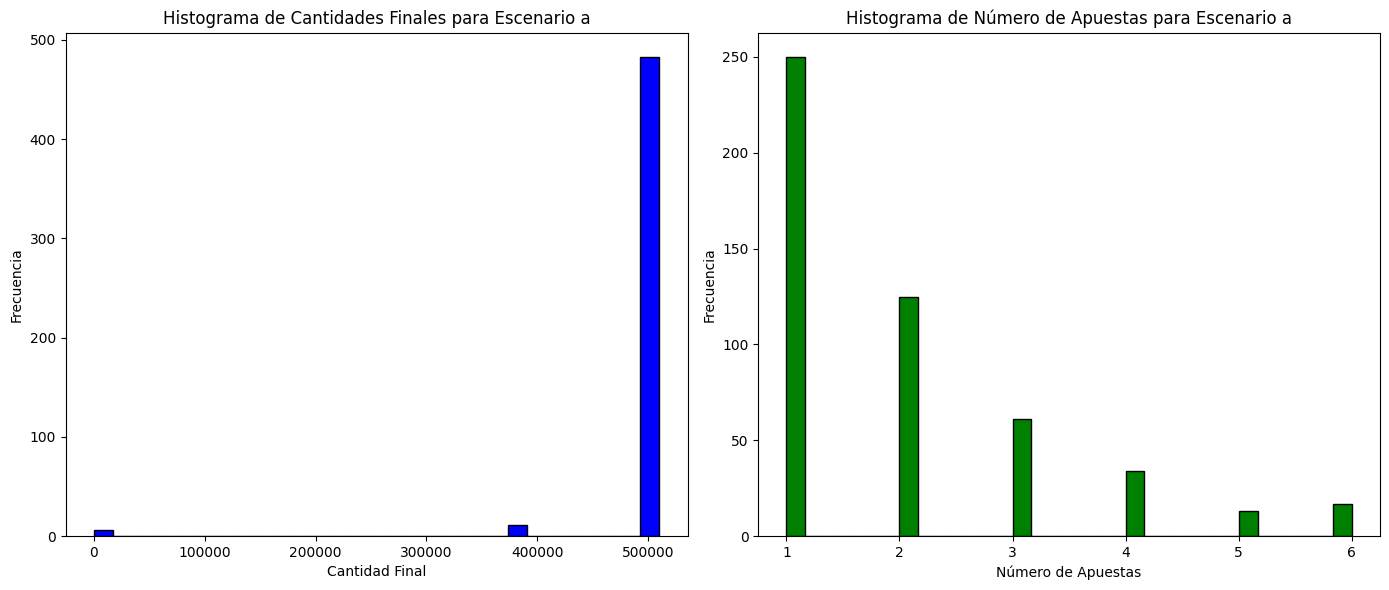

Escenario a:
  Media de la Cantidad Final: 501020.0
  Varianza de la cantidad final: 3412359600.0
  Media del Número de Apuestas: 1.972
  Varianza del Número de Apuestas: 1.6712159999999998
  Valor Esperado: 1020.0



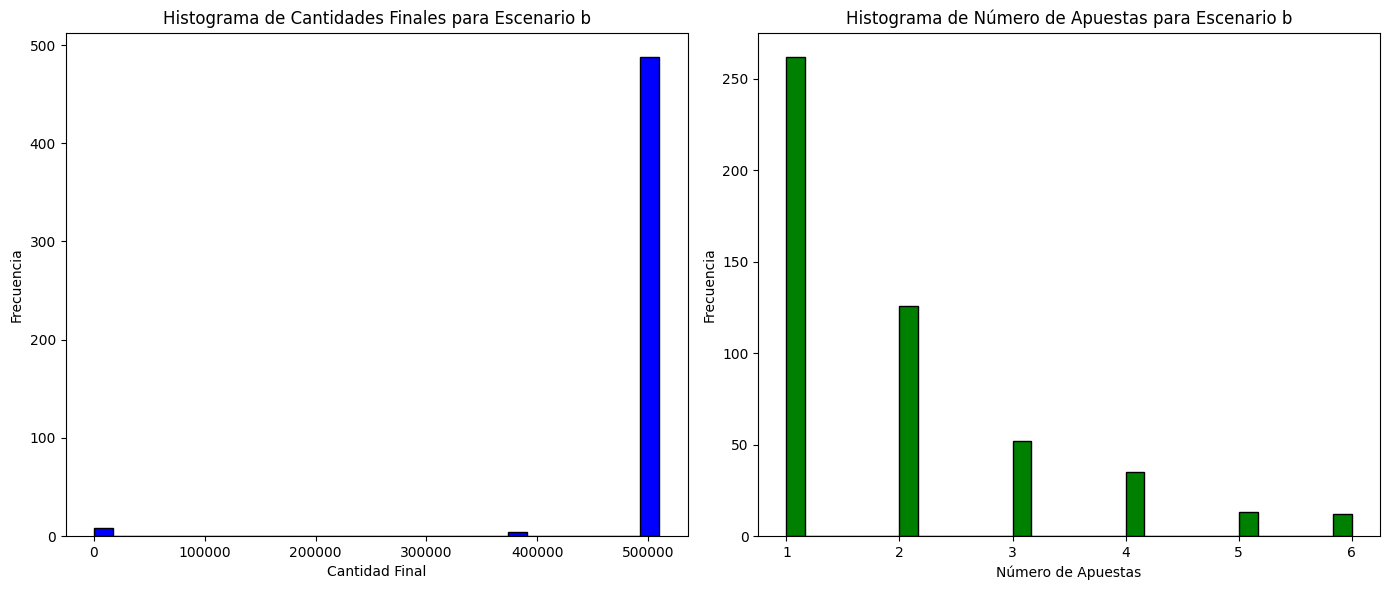

Escenario b:
  Media de la Cantidad Final: 500800.0
  Varianza de la cantidad final: 4212160000.0
  Media del Número de Apuestas: 1.894
  Varianza del Número de Apuestas: 1.5147640000000002
  Valor Esperado: 800.0



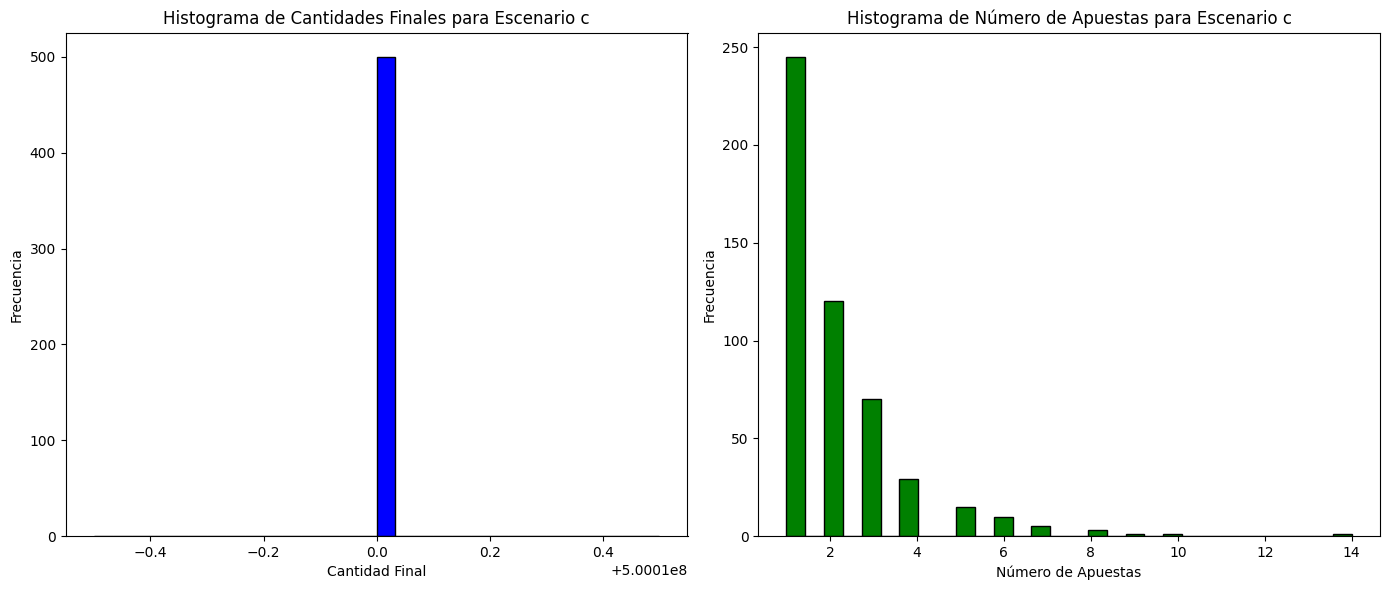

Escenario c:
  Media de la Cantidad Final: 500010000.0
  Varianza de la cantidad final: 0.0
  Media del Número de Apuestas: 2.076
  Varianza del Número de Apuestas: 2.4262239999999995
  Valor Esperado: 10000.0



In [ ]:
for scenario_label, (start_amount, max_bets) in scenarios.items():
    # Simular el juego 500 veces
    final_amounts, num_bets_list = simulate_martingale(start_amount, max_bets, stop_on_loss=False, num_trials=500)

    # Analizar resultados
    mean_final_amount = np.mean(final_amounts)
    var_final_amount = np.var(final_amounts)
    mean_num_bets = np.mean(num_bets_list)
    var_num_bets = np.var(num_bets_list)

    expected_value = mean_final_amount - start_amount

    # Graficar histogramas
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.hist(final_amounts, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histograma de Cantidades Finales para Escenario {scenario_label}')
    plt.xlabel('Cantidad Final')
    plt.ylabel('Frecuencia')

    # Histograma de Número de Apuestas
    plt.subplot(1, 2, 2)
    plt.hist(num_bets_list, bins=30, color='green', edgecolor='black')
    plt.title(f'Histograma de Número de Apuestas para Escenario {scenario_label}')
    plt.xlabel('Número de Apuestas')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

    print(f"Escenario {scenario_label}:")
    print(f"  Media de la Cantidad Final: {mean_final_amount}")
    print(f"  Varianza de la cantidad final: {var_final_amount}")
    print(f"  Media del Número de Apuestas: {mean_num_bets}")
    print(f"  Varianza del Número de Apuestas: {var_num_bets}")
    print(f"  Valor Esperado: {expected_value}\n")



# **Análisis escenario a:**

Para el escenario **a** se puede observar un valor esperado diferente para cada simulación pero **no siempre un valor esperado positivo**,
lo que demuestra que la estrategia de Martingala en este escenario no siempre favorece al jugador. Esto se debe a que, aunque la Martingala puede generar ganancias ocasionalmente, su naturaleza arriesgada y su dependencia del azar pueden llevar a pérdidas significativas.

En una simulación especifica se obtuvo las siguientes propiedades distribucionales:


```
Media de la Cantidad Final: 499000.0
Varianza de la cantidad final: 4797400000.0
Media del Número de Apuestas: 2.024
Varianza del Número de Apuestas: 1.739424
Valor Esperado: -1000.0
```

La media de la cantidad final sugiere que, en promedio, el jugador termina con una cantidad ligeramente inferior al monto inicial. La varianza indica la dispersión de los resultados. El valor esperado negativo de -1000.0 refleja la pérdida promedio por juego, subrayando que la estrategia no es sosteniblemente favorable.


# **Análisis escenario b:**

Para el escenario **b** se puede observar un valor esperado diferente para cada simulación pero **no siempre un valor esperado positivo** para el jugador,
demostrando que la estrategia de Martingala en este caso también puede llevar a pérdidas en promedio. Aunque puede haber rachas de victorias, la varianza en los resultados y el valor esperado negativo indican riesgos significativos.

En una simulación especifica se obtuvo las siguientes propiedades distribucionales:

```
Media de la Cantidad Final: 493600.0
Varianza de la cantidad final: 6514240000.0
Media del Número de Apuestas: 2.09
Varianza del Número de Apuestas: 2.0858999999999996
Valor Esperado: -6400.0
```

La media y la varianza siguen indicando una tendencia hacia pérdidas, y el valor esperado negativo de -6400.0 subraya nuevamente que la estrategia puede resultar desfavorable para el jugador.

# **Análisis escenario c:**

En el escenario **c** a diferencia de los escenarios anterior, se obtuvo un valor esperado constante, siempre positivo para el jugador de **10000**
Esto indica que, bajo las condiciones específicas del escenario **c**, la estrategia de Martingala parece favorecer consistentemente al jugador.

